In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from random import sample
import re
from Bio import SeqIO

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#for adding heavy chain
complementator = str.maketrans("ACGT", "TGCA") 

In [4]:
df_category_cancers = pd.read_csv('../data/processed/mus_musculus/df_category_pqs_mus.csv')

In [6]:
refseq = str(next(SeqIO.parse('../data/raw/mus_musculus/mm10_ChrM_oneline.fasta', 'fasta')).seq)

In [7]:
g4pqs = pd.read_csv('../data/processed/mus_musculus/g4pqs_mus.csv')
df_loop_mut_mus = pd.read_csv('../data/processed/mus_musculus/df_loop_mut_pqs_mus.csv')
df_10_col_mut = pd.read_csv('../data/processed/mus_musculus/df_10_col_mut_pqs_mus.csv')

In [8]:
df = pd.read_csv('../data/processed/mus_musculus/all_mut_mus.csv')

In [9]:
def get_norm_mutspec(df):
    
    normMut = pd.DataFrame()
    
    normMut[['A>C','A>G','A>T']] = df[['A>C','A>G','A>T']].div(df['A'], axis=0)
    normMut[['C>A','C>G','C>T']] = df[['C>A','C>G','C>T']].div(df['C'], axis=0)
    normMut[['G>A', 'G>C', 'G>T']] = df[['G>A', 'G>C', 'G>T']].div(df['G'], axis=0)
    normMut[['T>A', 'T>C', 'T>G']] = df[['T>A', 'T>C', 'T>G']].div(df['T'], axis=0)
    
    normMut = normMut.fillna(0)
    normMut = normMut.div(normMut.sum(axis=1), axis=0)
    
    normMut.columns = normMut.columns.str.translate(complementator)
    
    return normMut

In [10]:
def add_col_to_norm_mutspec(normMut:pd.DataFrame, df:pd.DataFrame):
    normMut.insert(0, 'G4_id', df['G4_id'])
    normMut.insert(1, 'side', df['side'])
    normMut = normMut.fillna(0)
    return normMut

In [11]:
norm_10_col = add_col_to_norm_mutspec(get_norm_mutspec(df_10_col_mut).fillna(0), df_10_col_mut)
norm_loop = add_col_to_norm_mutspec(get_norm_mutspec(df_loop_mut_mus).fillna(0), df_loop_mut_mus)

In [12]:
norm_10_col['location'] = norm_10_col['side'].str[:2].astype(int)
norm_loop['location'] = 0

In [14]:
norm_10_col

,G4_id,side,T>G,T>C,T>A,G>T,G>C,G>A,C>T,C>G,C>A,A>T,A>G,A>C,location
0,1,10_up,0.019900,0.039801,0.000000,0.044776,0.000000,0.059701,0.716418,0.059701,0.059701,0.000000,0.000000,0.000000,10
1,2,10_up,0.010724,0.064343,0.000000,0.024129,0.016086,0.064343,0.739946,0.000000,0.000000,0.000000,0.080429,0.000000,10
2,3,10_up,0.000000,0.181818,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290909,0.436364,0.000000,10
3,4,10_up,0.000000,0.056338,0.000000,0.014085,0.028169,0.000000,0.788732,0.042254,0.014085,0.000000,0.049296,0.007042,10
4,5,10_up,0.044944,0.224719,0.044944,0.269663,0.000000,0.044944,0.000000,0.000000,0.000000,0.000000,0.370787,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,22,30_down,0.049180,0.098361,0.000000,0.196721,0.065574,0.131148,0.000000,0.000000,0.000000,0.000000,0.393443,0.065574,30
152,23,30_down,0.000000,0.000000,0.000000,0.346154,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.384615,0.038462,30
153,24,30_down,0.000000,0.089820,0.000000,0.149701,0.119760,0.479042,0.000000,0.000000,0.000000,0.000000,0.161677,0.000000,30
154,26,30_down,0.000000,0.012146,0.008097,0.048583,0.036437,0.157895,0.631579,0.008097,0.008097,0.000000,0.089069,0.000000,30


In [15]:
norm_loop

,G4_id,side,T>G,T>C,T>A,G>T,G>C,G>A,C>T,C>G,C>A,A>T,A>G,A>C,location
0,1,loops,0.000000,0.030769,0.000000,0.000000,0.030769,0.030769,0.723077,0.030769,0.092308,0.000000,0.061538,0.000000,0
1,2,loops,0.013072,0.013072,0.000000,0.000000,0.000000,0.000000,0.745098,0.058824,0.117647,0.000000,0.052288,0.000000,0
2,3,loops,0.000000,0.015234,0.000000,0.019042,0.000000,0.057127,0.837867,0.019042,0.019042,0.005441,0.027203,0.000000,0
3,4,loops,0.050000,0.100000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0
4,5,loops,0.000000,0.012876,0.000000,0.042918,0.000000,0.021459,0.798283,0.012876,0.068670,0.000000,0.021459,0.021459,0
5,6,loops,0.000000,0.000000,0.000000,0.000000,0.042553,0.212766,0.510638,0.042553,0.148936,0.000000,0.042553,0.000000,0
6,7,loops,0.000000,0.014634,0.000000,0.000000,0.000000,0.000000,0.839024,0.019512,0.009756,0.000000,0.117073,0.000000,0
7,8,loops,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.941176,0.000000,0
8,9,loops,0.000000,0.064935,0.000000,0.000000,0.077922,0.077922,0.571429,0.077922,0.077922,0.000000,0.051948,0.000000,0
9,10,loops,0.000000,0.023810,0.000000,0.023810,0.023810,0.047619,0.750000,0.000000,0.071429,0.011905,0.035714,0.011905,0


In [16]:
norm_merged = pd.concat([norm_10_col,norm_loop])

In [17]:
norm_merged

,G4_id,side,T>G,T>C,T>A,G>T,G>C,G>A,C>T,C>G,C>A,A>T,A>G,A>C,location
0,1,10_up,0.019900,0.039801,0.000000,0.044776,0.000000,0.059701,0.716418,0.059701,0.059701,0.000000,0.000000,0.000000,10
1,2,10_up,0.010724,0.064343,0.000000,0.024129,0.016086,0.064343,0.739946,0.000000,0.000000,0.000000,0.080429,0.000000,10
2,3,10_up,0.000000,0.181818,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290909,0.436364,0.000000,10
3,4,10_up,0.000000,0.056338,0.000000,0.014085,0.028169,0.000000,0.788732,0.042254,0.014085,0.000000,0.049296,0.007042,10
4,5,10_up,0.044944,0.224719,0.044944,0.269663,0.000000,0.044944,0.000000,0.000000,0.000000,0.000000,0.370787,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,23,loops,0.027027,0.081081,0.040541,0.243243,0.040541,0.283784,0.000000,0.000000,0.000000,0.000000,0.283784,0.000000,0
23,24,loops,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
24,25,loops,0.000000,0.016557,0.000000,0.013797,0.018396,0.275947,0.597884,0.009198,0.009198,0.001533,0.057489,0.000000,0
25,26,loops,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.925000,0.025000,0.025000,0.000000,0.000000,0.000000,0


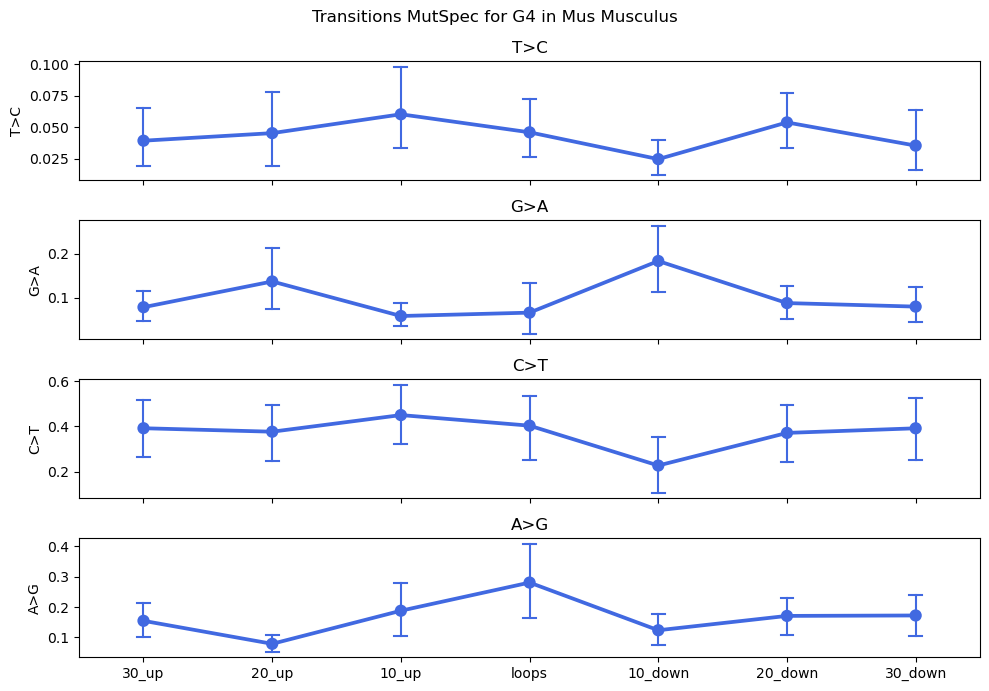

In [18]:
fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = ['30_up', '20_up', '10_up', 'loops', '10_down', '20_down', '30_down']

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=norm_merged, 
                 x=norm_merged['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)


plt.suptitle('Transitions MutSpec for G4 in Mus Musculus')
plt.tight_layout()
plt.show()

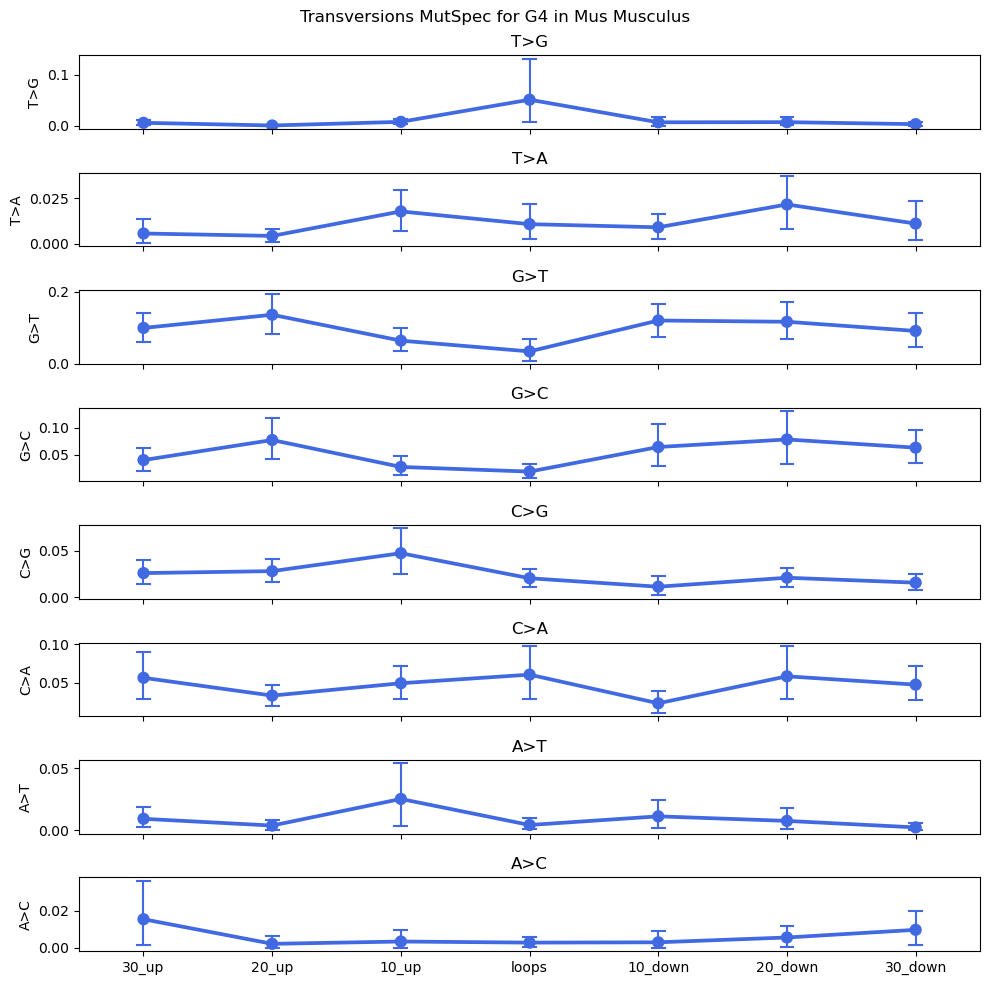

In [19]:
fig, axs = plt.subplots(8, sharex=True, figsize=(10, 10))
mutations = ['T>G', 'T>A', 'G>T', 'G>C', 'C>G', 'C>A', 'A>T', 'A>C']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = ['30_up', '20_up', '10_up', 'loops', '10_down', '20_down', '30_down']

for i, mutation in enumerate(mutations):
    row = i % 8
    sns.pointplot(data=norm_merged, 
                 x=norm_merged['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)

plt.suptitle('Transversions MutSpec for G4 in Mus Musculus')
plt.tight_layout()
plt.show()

In [20]:
df_loop_mut_mus['n_mut/length'] = df_loop_mut_mus['number_of_Mut']/df_loop_mut_mus['sequence'].apply(lambda x:len(x))

In [21]:
df_10_col_mut['n_mut/length'] = df_10_col_mut['number_of_Mut']/10

In [22]:
df_mut_concat = pd.concat([df_loop_mut_mus, df_10_col_mut]) 

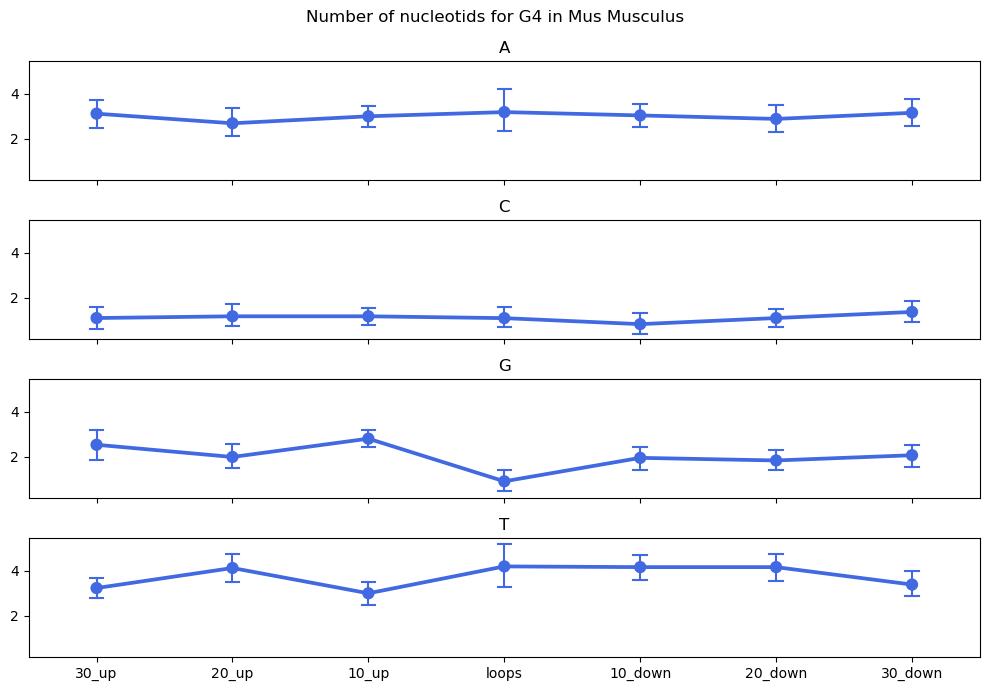

In [23]:
fig, axs = plt.subplots(4, sharex=True, sharey=True,  figsize=(10, 7))
mutations = ['T', 'G', 'C', 'A']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid'] 
order = ['30_up', '20_up', '10_up', 'loops', '10_down', '20_down', '30_down']

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=df_mut_concat, 
                 x=df_mut_concat['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation.translate(complementator), xlabel=None, ylabel=None)


plt.suptitle('Number of nucleotids for G4 in Mus Musculus')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Number of Mut / interval length in G4 Mus'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

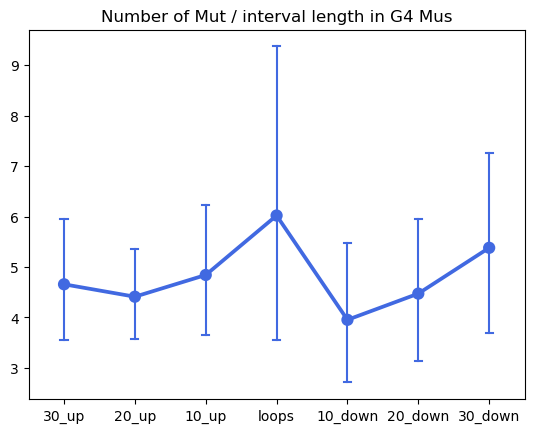

In [25]:
sns.pointplot(data=df_mut_concat, 
                 x=df_mut_concat['side'], y=df_mut_concat['n_mut/length'], 
              color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title='Number of Mut / interval length in G4 Mus', xlabel=None, ylabel=None)

[Text(0.5, 1.0, 'Number of Mut / interval length in G4 Mus'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

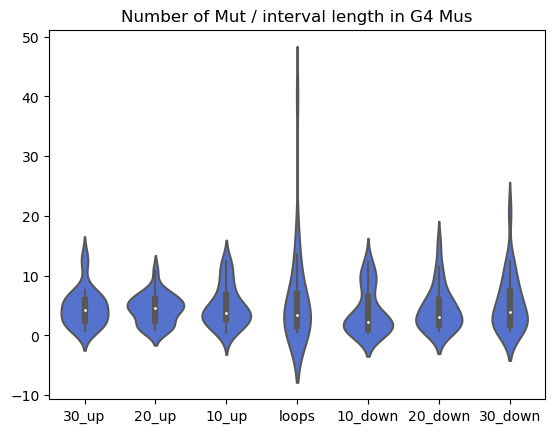

In [26]:
sns.violinplot(data=df_mut_concat, 
                 x=df_mut_concat['side'], y=df_mut_concat['n_mut/length'], 
              color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title='Number of Mut / interval length in G4 Mus', xlabel=None, ylabel=None)

In [29]:
df_mut_concat[df_mut_concat['n_mut/length'] > 30]

,G4_id,side,positions,sequence,A,C,G,T,A>C,A>G,...,G>A,G>C,G>T,T>A,T>C,T>G,number_of_Mut,n_mut/length,window_start,window_end
25,26,loops,"[15717, 15721]",GA,1.0,0.0,1.0,0.0,0.0,2.0,...,74.0,2.0,2.0,0.0,0.0,0.0,80.0,40.0,NaN,NaN


[Text(0.5, 1.0, 'Number of Mut / interval length < 30 in G4 Mus'),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

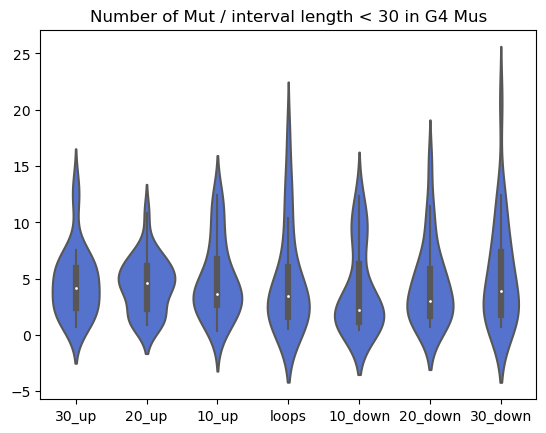

In [31]:
sns.violinplot(data=df_mut_concat[df_mut_concat['n_mut/length'] < 30], 
                 x='side', y='n_mut/length', 
              color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title='Number of Mut / interval length < 30 in G4 Mus', xlabel=None, ylabel=None)

### ?Sampling

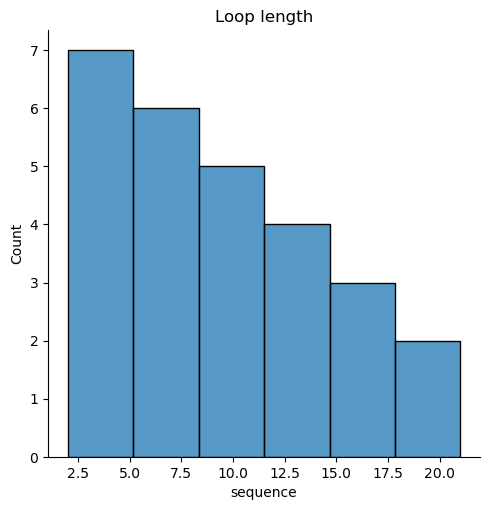

In [32]:
sns.displot(df_loop_mut_mus['sequence'].apply(lambda x: len(x))).set(title='Loop length')

In [33]:
df_loop_mut_mus[df_loop_mut_mus['sequence'].apply(lambda x: len(x)) < 10].shape

(14, 22)

In [20]:
# df_loop_cancer[df_loop_cancer['sequence'].apply(lambda x: len(x)) >= 10][['G4_id', 'side', 'positions']]

In [21]:
def sampling_data(df:pd.DataFrame, sample_size:int, frac:int, mode:str):
    all_sampling_data = []
    if mode == 'loops': 
        for row, G4_id in zip(df['positions'], 
                              df['G4_id']):
            
            for i in range(sample_size):
                sample_loops = []
                l = list(map(int, row.strip('[]').replace(' ', '').split(',')))
                frac = frac
                sample_l = sorted(sample(l, int(len(l) * frac)))
                seq = ''.join(ref_annot[ref_annot['Pos'].isin(sample_l)].Nuc.values)
                
                sample_loops.append(G4_id)
                sample_loops.append('loops')
                sample_loops.append(sample_l)
                sample_loops.append(seq)
                all_sampling_data.append(sample_loops)
    
    elif mode == 'around':
        for start, end, side, G4_id in zip(df['window_start'], 
                                     df['window_end'],
                                     df['side'],
                                     df['G4_id']):
            for i in range(sample_size):
                sample_around = []
                l = [*range(start, end)]
                frac = frac
                sample_l = sorted(sample(l, int(len(l) * frac)))
                seq = ''.join(ref_annot[ref_annot['Pos'].isin(sample_l)].Nuc.values)
                sample_around.append(G4_id)
                sample_around.append(side)
                sample_around.append(sample_l)
                sample_around.append(seq)
                all_sampling_data.append(sample_around)
    
    return all_sampling_data
    

In [22]:
def make_sampling_df(sampling_list):
    df = pd.DataFrame(data=sampling_list, columns = ['G4_id', 'side', 'positions', 'sequence'])
    nuc_count = df['sequence'].apply(lambda x: Counter(x))
    nuc_count = pd.DataFrame.from_records(nuc_count).sort_index(axis=1)
    df = df.join(nuc_count).fillna(0)
    return df

In [23]:
def collect_mut_cancer(df_cancers:pd.DataFrame, df_win:pd.DataFrame, regime:str):
    if regime == '2col':
        Mut_win = []
        for window_start, window_end in zip(df_win['window_start'], df_win['window_end']):
            row = [*range(window_start, window_end)]
            Mut_win.append(str(df_cancers[df_cancers['Pos'].isin(row)].Mut.values))
    elif regime == '1col':
        Mut_win = []
        for row in df_win['positions']:
            # Mut_win.append(str(df_cancers[df_cancers['Pos'].isin( \
            #     list(map(int, row.strip('[]').replace(' ', '').split(','))) \
            #                                                     )].Mut.values))
            Mut_win.append(str(df_cancers[df_cancers['Pos'].isin(row)].Mut.values))
            
    elif regime == 'pos':
        Mut_win = []
        for i in df_win['pos_in_ref']:
            Mut_win.append(str(df_cancers[df_cancers['Pos'] == i].Mut.values))
    
    Mut_win_df = pd.DataFrame(Mut_win)
    Mut_win_df[0] = Mut_win_df[0].str.findall("[A-T]>[A-T]")
    obsMutwin = pd.DataFrame.from_records(Mut_win_df[0].apply(lambda x: Counter(x))).fillna(0).sort_index(axis=1)
    df_win_cancer = df_win.join(obsMutwin)
    df_win_cancer['number_of_Mut'] = df_win_cancer[['A>C','A>G','A>T',
                                                    'C>A','C>G','C>T',
                                                'G>A','G>C','G>T',
                                                'T>A','T>C','T>G']].sum(axis=1)
    return df_win_cancer

In [24]:
all_sample_loops = sampling_data(df_loop_cancer[df_loop_cancer['sequence'].apply(lambda x: len(x)) >= 10], 
                                  sample_size=50, frac=0.5, mode='loops')

In [25]:
# pd.DataFrame(data=all_sample_loops)[:52]

In [26]:
df_sample_loops = collect_mut_cancer(df_cancers, make_sampling_df(all_sample_loops), regime='1col')

In [27]:
all_sample_data = sampling_data(df_15_col_cancer[['G4_id', 'side', 'window_start', 'window_end']],
                                sample_size=50, frac=0.5, mode='around')

In [28]:
df_sample_15 = collect_mut_cancer(df_cancers, make_sampling_df(all_sample_data), regime='1col')

In [29]:
df_sample_15[df_sample_15['G4_id'].isin(df_sample_loops['G4_id'].unique())]

,G4_id,side,positions,sequence,A,C,G,T,A>C,A>G,...,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,number_of_Mut
50,2,15_up,"[338, 341, 342, 344, 349, 350, 352]",CATTCAA,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
51,2,15_up,"[339, 341, 343, 345, 346, 348, 352]",AACCTCA,3.0,3.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
52,2,15_up,"[340, 341, 345, 348, 349, 350, 352]",CACCCAA,3.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,2,15_up,"[338, 340, 343, 345, 348, 349, 351]",CCCCCCA,1.0,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
54,2,15_up,"[338, 339, 340, 341, 346, 349, 351]",CACATCA,3.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,67,45_down,"[16410, 16412, 16414, 16415, 16416, 16422, 16423]",CGGAATA,3.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17896,67,45_down,"[16411, 16412, 16413, 16416, 16420, 16422, 16424]",CGTAATT,2.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17897,67,45_down,"[16411, 16413, 16419, 16420, 16421, 16423, 16424]",CTCAAAT,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17898,67,45_down,"[16410, 16413, 16418, 16419, 16420, 16422, 16423]",CTTCATA,2.0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_sample_norm_l = add_col_to_norm_mutspec(get_norm_mutspec(df_sample_loops), df_sample_loops)

In [31]:
df_sample_norm_15 = add_col_to_norm_mutspec(get_norm_mutspec(df_sample_15), df_sample_15)

In [32]:
df_sample_norm_15[df_sample_norm_15['G4_id'] == 2]

,G4_id,side,T>G,T>C,T>A,G>T,G>C,G>A,C>T,C>G,C>A,A>T,A>G,A>C
50,2,15_up,0.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,0.333333,0.0
51,2,15_up,0.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0
52,2,15_up,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
53,2,15_up,0.0,0.0,0.0,0.200000,0.0,0.800000,0.0,0.0,0.0,0.0,0.000000,0.0
54,2,15_up,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,2,45_down,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
15196,2,45_down,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
15197,2,45_down,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
15198,2,45_down,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [33]:
df_sample_15[df_sample_15['G4_id'] == 2]

,G4_id,side,positions,sequence,A,C,G,T,A>C,A>G,...,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,number_of_Mut
50,2,15_up,"[338, 341, 342, 344, 349, 350, 352]",CATTCAA,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
51,2,15_up,"[339, 341, 343, 345, 346, 348, 352]",AACCTCA,3.0,3.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
52,2,15_up,"[340, 341, 345, 348, 349, 350, 352]",CACCCAA,3.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,2,15_up,"[338, 340, 343, 345, 348, 349, 351]",CCCCCCA,1.0,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
54,2,15_up,"[338, 339, 340, 341, 346, 349, 351]",CACATCA,3.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,2,45_down,"[417, 420, 421, 427, 429, 430, 431]",GCTCGTC,0.0,3.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15196,2,45_down,"[417, 418, 419, 420, 423, 426, 428]",GCACTAA,3.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15197,2,45_down,"[421, 422, 424, 426, 428, 430, 431]",TTTAATC,2.0,1.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15198,2,45_down,"[420, 421, 422, 424, 427, 428, 431]",CTTTCAC,1.0,3.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
df_sample_norm_concat = pd.concat([df_sample_norm_l, 
                                   df_sample_norm_15[df_sample_norm_15['G4_id'].isin(df_sample_norm_l['G4_id'].unique())]]) \
    .reset_index(drop=True)

In [35]:
df_sample_norm_concat.columns

Index(['G4_id', 'side', 'T>G', 'T>C', 'T>A', 'G>T', 'G>C', 'G>A', 'C>T', 'C>G',
       'C>A', 'A>T', 'A>G', 'A>C'],
      dtype='object')

In [36]:
df_sample_norm_concat

,G4_id,side,T>G,T>C,T>A,G>T,G>C,G>A,C>T,C>G,C>A,A>T,A>G,A>C
0,2,loops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,loops,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,loops,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,loops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,loops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16345,67,45_down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16346,67,45_down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16347,67,45_down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16348,67,45_down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
mutations = ['T>G', 'T>C', 'T>A', 'G>T', 'G>C', 'G>A', 'C>T', 'C>G',
       'C>A', 'A>T', 'A>G', 'A>C']

In [38]:
df_sample_norm_concat['side'].nunique() * df_sample_norm_concat['G4_id'].nunique() * len(mutations)

4368

In [39]:
dct = {}
for G4_id in df_sample_norm_concat['G4_id'].unique():
    for side in df_sample_norm_concat['side'].unique():
        for mut in mutations:
            dct[f"sample_{G4_id}_{side}_{mut}"] = df_sample_norm_concat[(df_sample_norm_concat['G4_id'] == G4_id) & 
                                                                        (df_sample_norm_concat['side'] == side)][mut]

In [40]:
# for G4_id in df_sample_norm_concat['G4_id'].unique():
#     for mut in mutations:
#         print(G4_id, mut, '\n', stats.kruskal(dct[f"sample_{G4_id}_loops_{mut}"], dct[f"sample_{G4_id}_15_up_{mut}"], dct[f"sample_{G4_id}_15_down_{mut}"], dct[f"sample_{G4_id}_30_up_{mut}"], dct[f"sample_{G4_id}_30_down_{mut}"], dct[f"sample_{G4_id}_45_up_{mut}"],dct[f"sample_{G4_id}_45_down_{mut}"])[1])

In [41]:
df_sample_norm_concat['G4_id'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 11, 15, 16, 18, 20, 21, 22, 25, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66,
       67], dtype=int64)

In [42]:
df_mu_15 = []
for G4_id in df_sample_norm_concat['G4_id'].unique():
    
    for mut in mutations:
        a_up = []
        a_down = []
        if (dct[f"sample_{G4_id}_15_up_{mut}"].empty == True) | (dct[f"sample_{G4_id}_15_down_{mut}"].empty == True):
            break
        else:
            # print(G4_id, mut, '\n',
            #   'loop+15up', stats.mannwhitneyu(dct[f"sample_{G4_id}_loops_{mut}"], dct[f"sample_{G4_id}_15_up_{mut}"])[1], '\n', \
            #   'loop+15down', stats.mannwhitneyu(dct[f"sample_{G4_id}_loops_{mut}"], dct[f"sample_{G4_id}_15_down_{mut}"])[1], '\n')
            a_up += G4_id, mut, \
            'loop+15up', stats.mannwhitneyu(dct[f"sample_{G4_id}_loops_{mut}"], dct[f"sample_{G4_id}_15_up_{mut}"])[1]
            a_down += G4_id, mut, \
            'loop+15down', stats.mannwhitneyu(dct[f"sample_{G4_id}_loops_{mut}"], dct[f"sample_{G4_id}_15_down_{mut}"])[1]
            
            df_mu_15.append(a_up)
            df_mu_15.append(a_down)

In [44]:
df_mu_15 = pd.DataFrame(df_mu_15, columns=['G4_id', 'mut', 'side', 'p_val'])

In [52]:
df_mu_15.head()

,G4_id,mut,side,p_val
0,2,T>G,loop+15up,1.000000e+00
1,2,T>G,loop+15down,1.000000e+00
2,2,T>C,loop+15up,1.000000e+00
3,2,T>C,loop+15down,1.000000e+00
4,2,T>A,loop+15up,7.546196e-11


In [45]:
df_mu_15.G4_id.nunique()

49

In [46]:
mut_per_id = df_mu_15[df_mu_15['p_val'] < 0.05].groupby('G4_id').agg({'mut': 'value_counts'}).rename(columns={'mut':'count'})

In [55]:
mut_per_id.head()

count
G4_id mut       
2     T>A      2
      G>A      1
      G>T      1
      C>T      1
      A>G      1

In [47]:
mut_per_id[mut_per_id['count'] > 1].reset_index().G4_id.value_counts()

G4_id
65    5
43    5
36    4
15    4
64    4
61    4
50    4
28    4
67    4
16    3
18    3
40    3
37    3
49    3
51    3
52    3
54    3
45    3
59    3
22    3
57    2
7     2
4     2
46    2
66    2
55    2
9     2
42    2
38    2
3     2
34    2
31    2
11    2
25    2
21    2
20    2
8     1
35    1
30    1
29    1
60    1
6     1
2     1
Name: count, dtype: int64

In [48]:
mut_per_id[mut_per_id['count'] > 1].reset_index().mut.value_counts()

mut
T>C    26
C>T    23
A>G    22
T>A    11
G>A     9
T>G     7
G>T     3
C>G     3
C>A     2
A>T     2
A>C     1
G>C     1
Name: count, dtype: int64

In [49]:
# на семплированных данных
# только у половины Г4 (55% (27, всего 49шт)) C>T значимо отличается от окружения +-15bp

In [50]:
mut_per_id.reset_index().mut.value_counts()

mut
C>T    47
A>G    43
T>C    39
G>A    30
T>A    13
C>G    13
T>G    12
G>T    10
A>C     6
C>A     4
A>T     4
G>C     4
Name: count, dtype: int64

In [51]:
# на семплированных данных
# у большей части Г4 (96% (47, всего 49шт)) C>T значимо отличается хотя бы с одной стороны окружения +-15bp

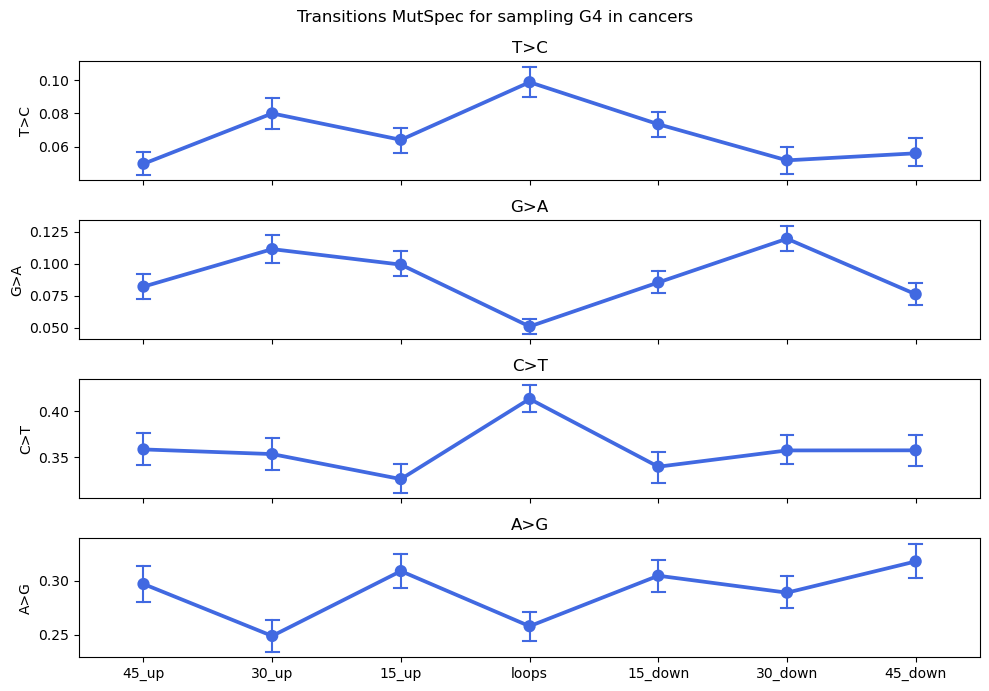

In [56]:
fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = ['45_up', '30_up', '15_up', 'loops', '15_down', '30_down', '45_down']

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=df_sample_norm_concat, 
                 x=df_sample_norm_concat['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)


plt.suptitle('Transitions MutSpec for sampling G4 in cancers')
plt.tight_layout()
plt.show()

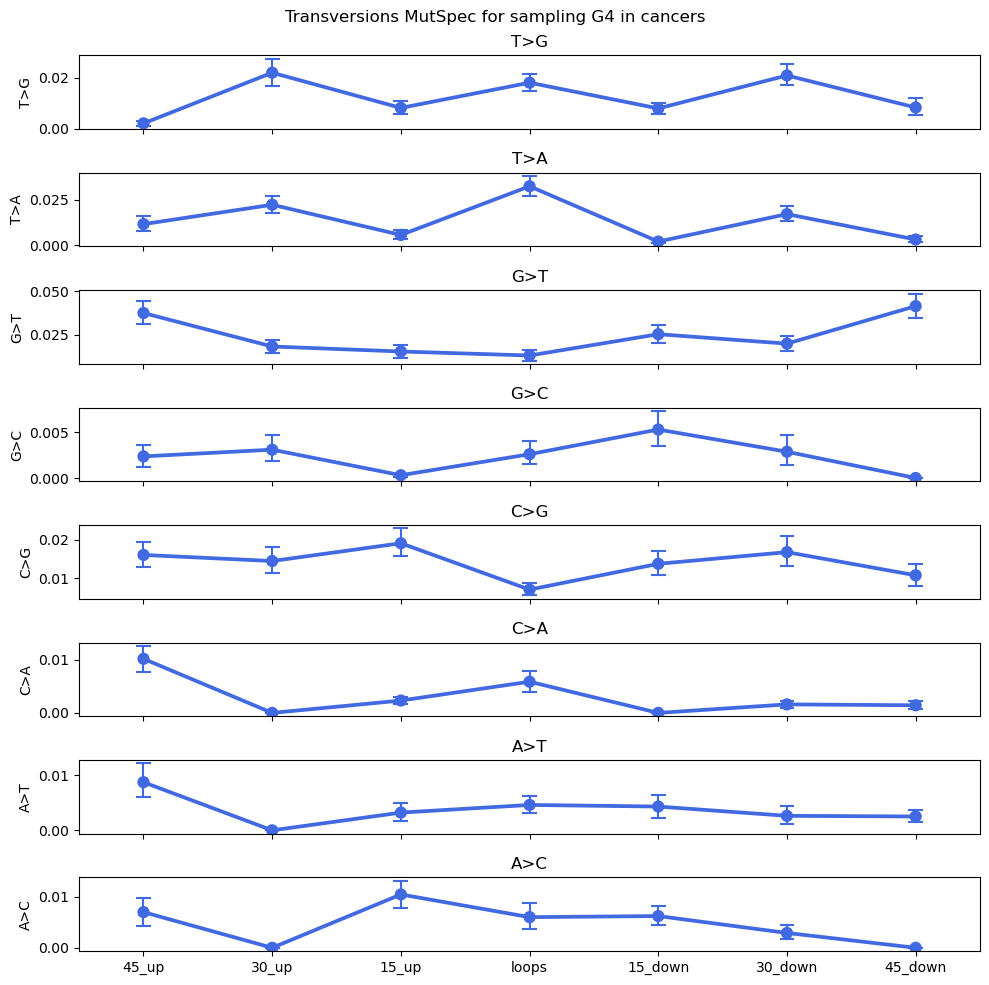

In [63]:
fig, axs = plt.subplots(8, sharex=True, figsize=(10, 10))
mutations = ['T>G', 'T>A', 'G>T', 'G>C', 'C>G', 'C>A', 'A>T', 'A>C']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = ['45_up', '30_up', '15_up', 'loops', '15_down', '30_down', '45_down']

for i, mutation in enumerate(mutations):
    row = i % 8
    sns.pointplot(data=df_sample_norm_concat, 
                 x=df_sample_norm_concat['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)

plt.suptitle('Transversions MutSpec for sampling G4 in cancers')
plt.tight_layout()
plt.show()

#### Transitions for each G4, sampling data

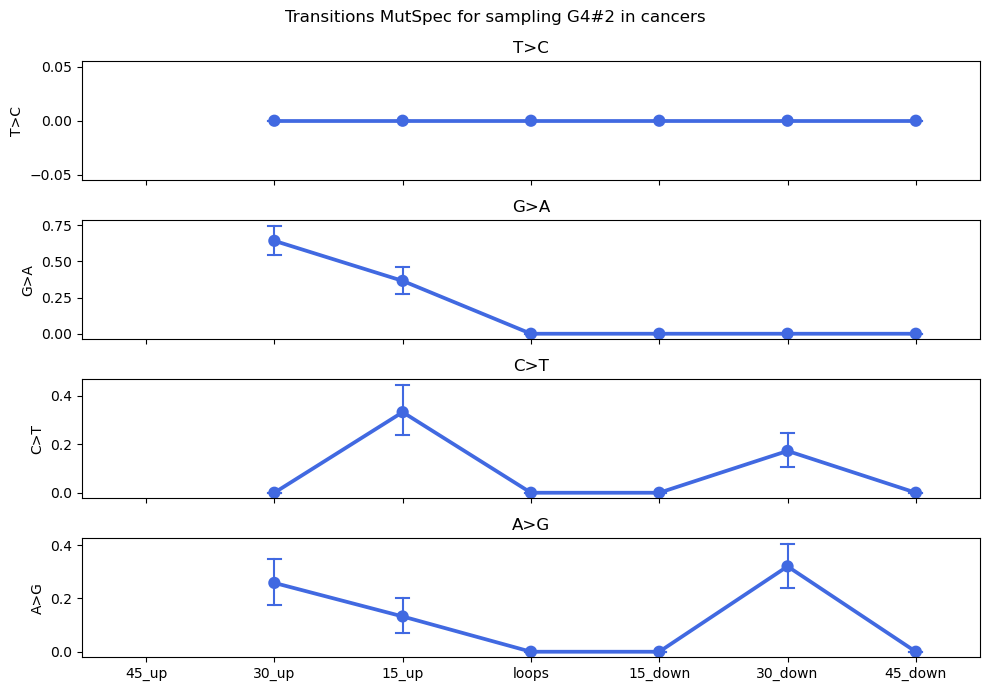

In [58]:
fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
order = ['45_up', '30_up', '15_up', 'loops', '15_down', '30_down', '45_down']

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.pointplot(data=df_sample_norm_concat[df_sample_norm_concat['G4_id']==2], 
                 x=df_sample_norm_concat[df_sample_norm_concat['G4_id']==2]['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
        .set(title=mutation, xlabel=None)


plt.suptitle('Transitions MutSpec for sampling G4#2 in cancers')
plt.tight_layout()
plt.show()

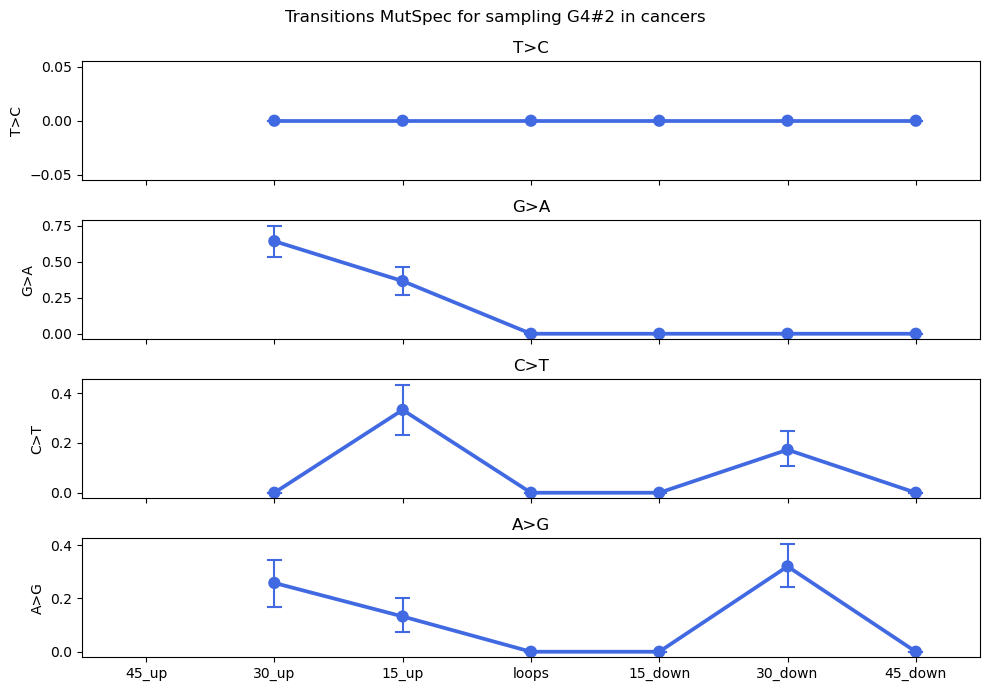

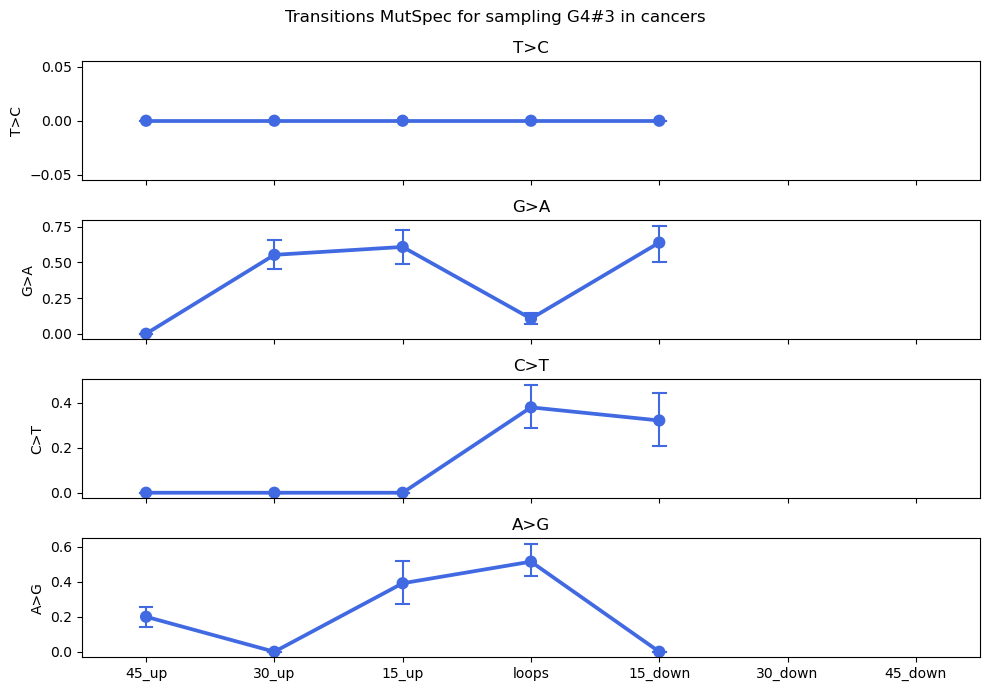

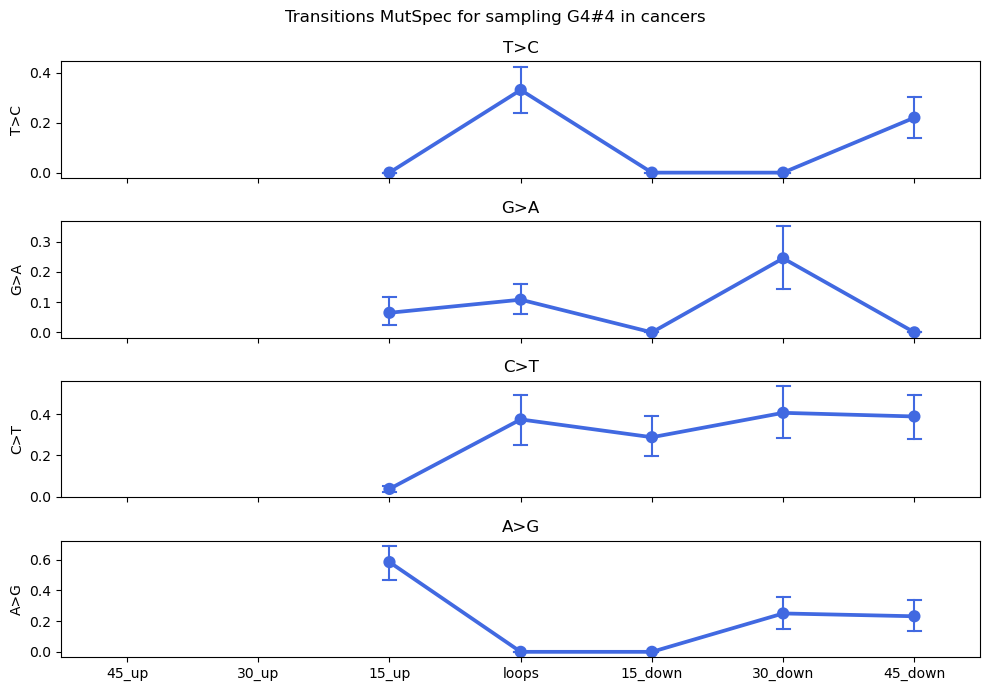

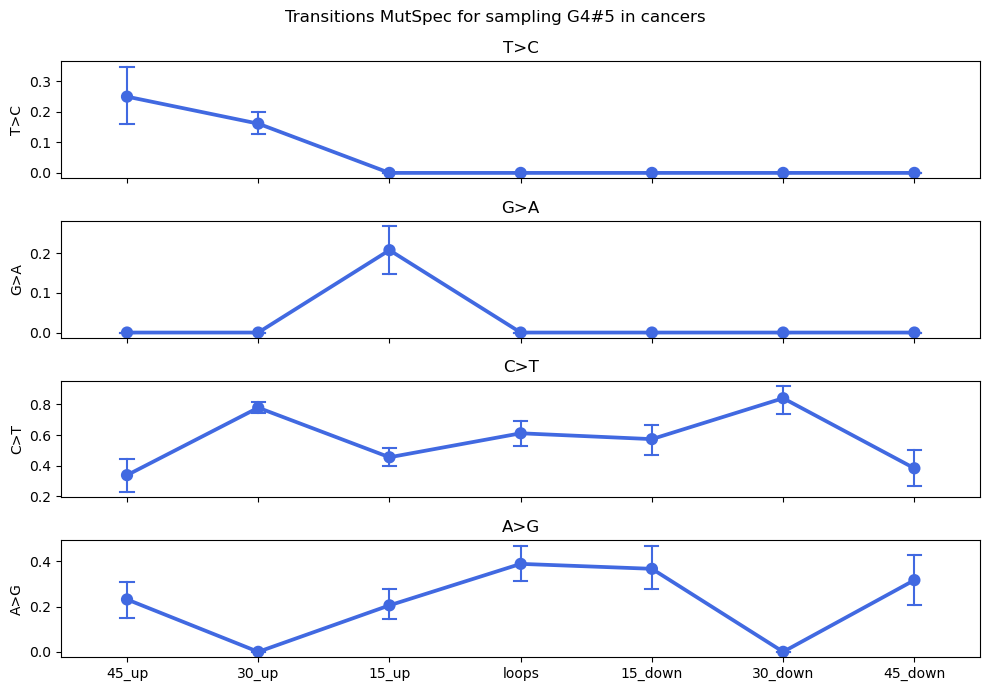

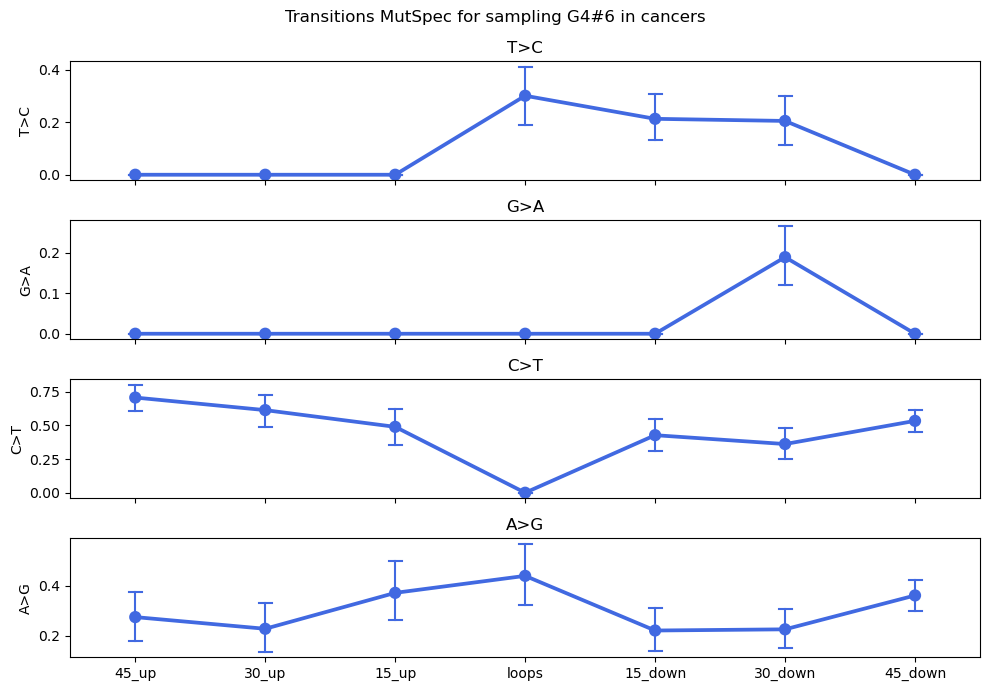

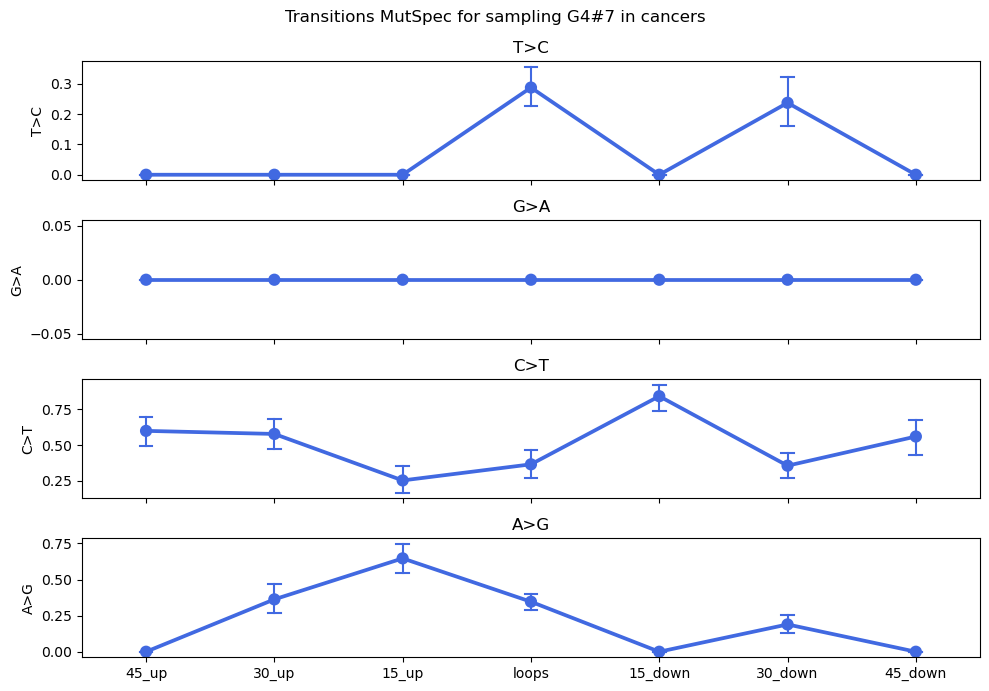

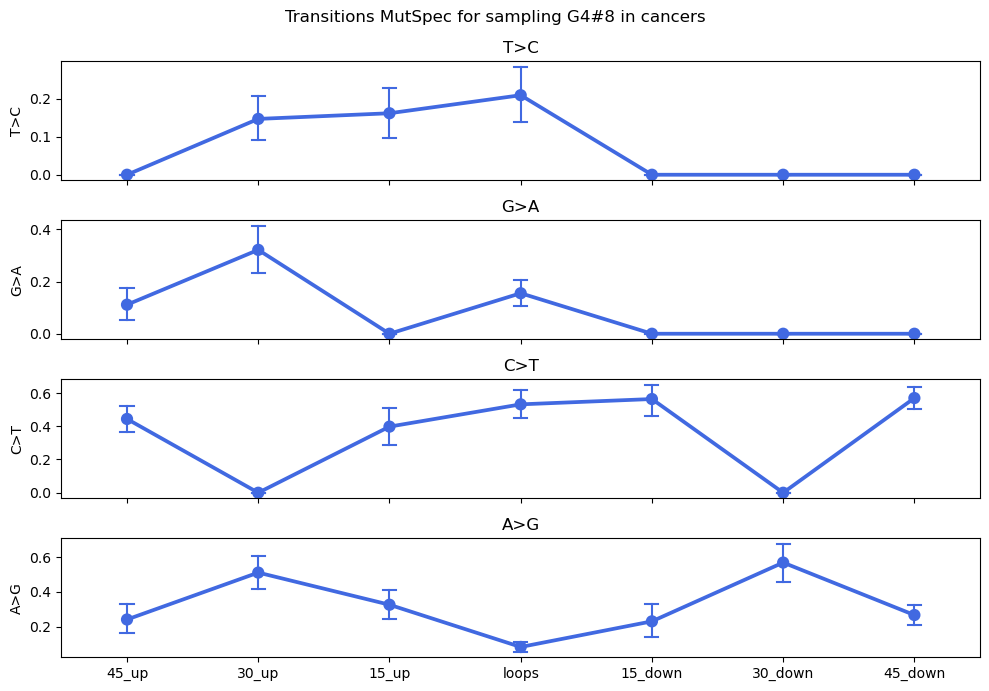

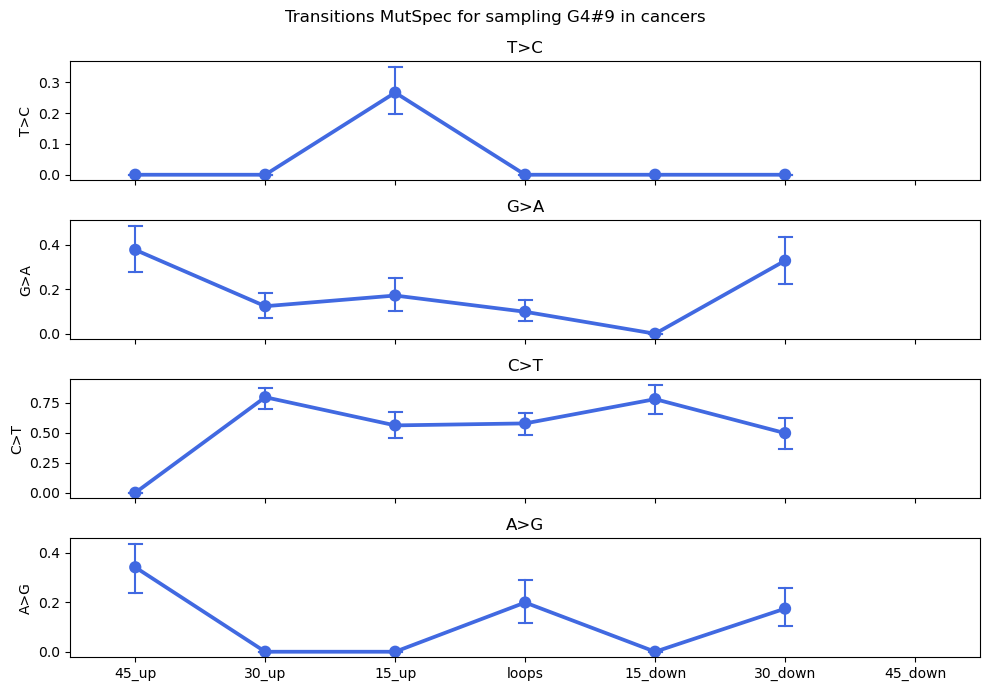

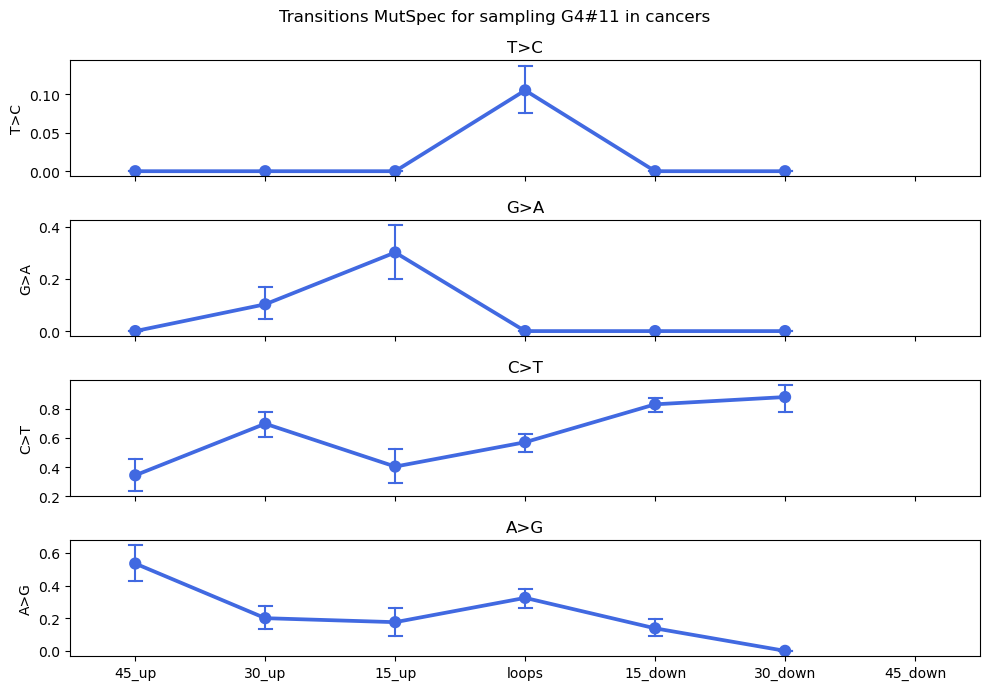

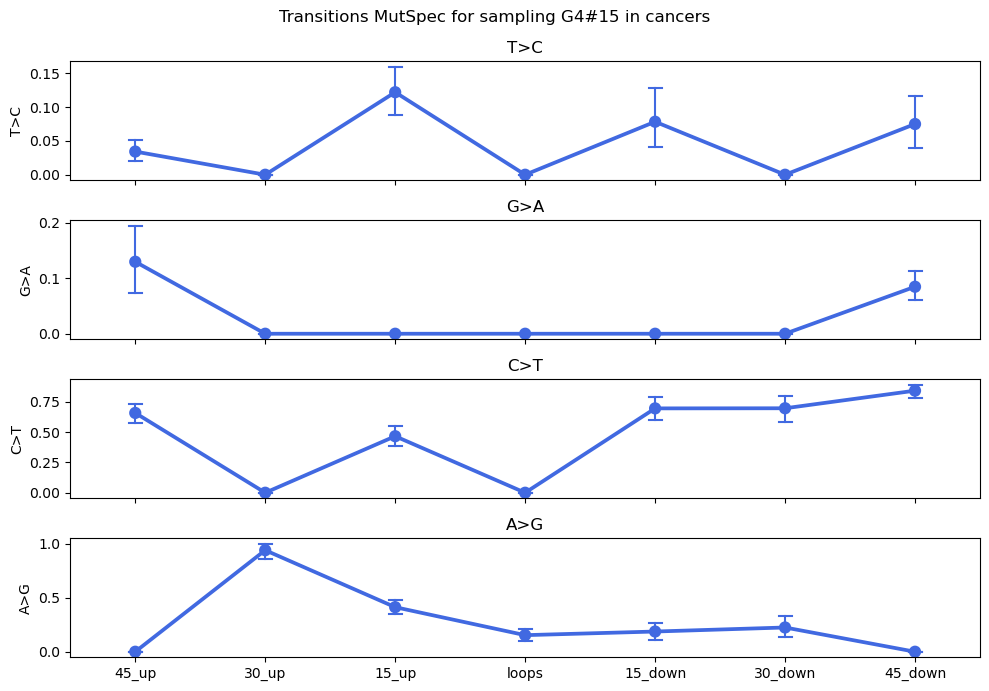

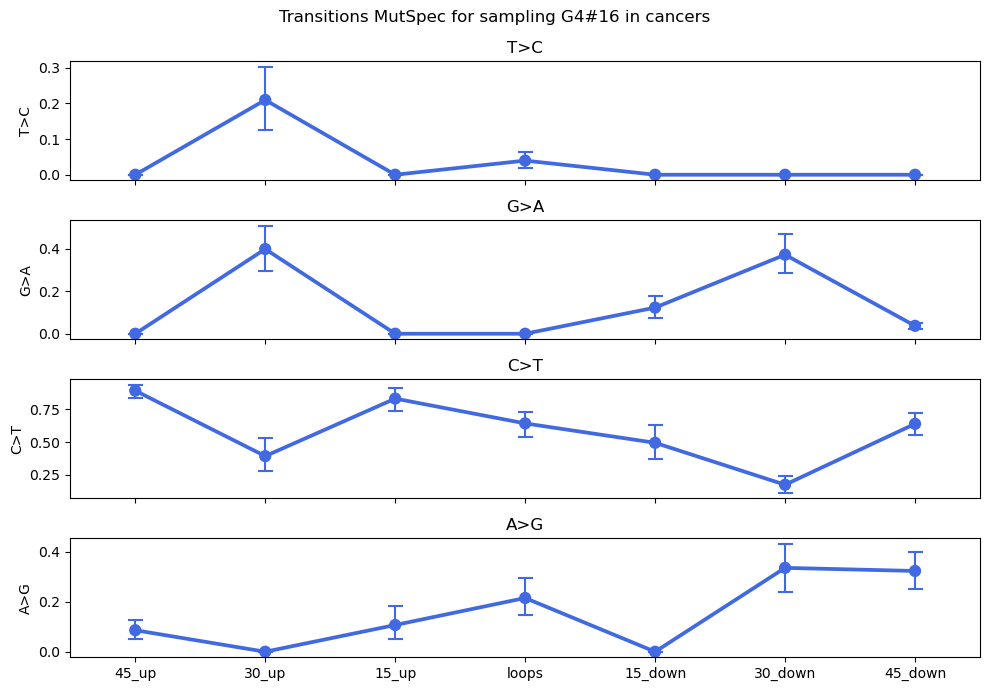

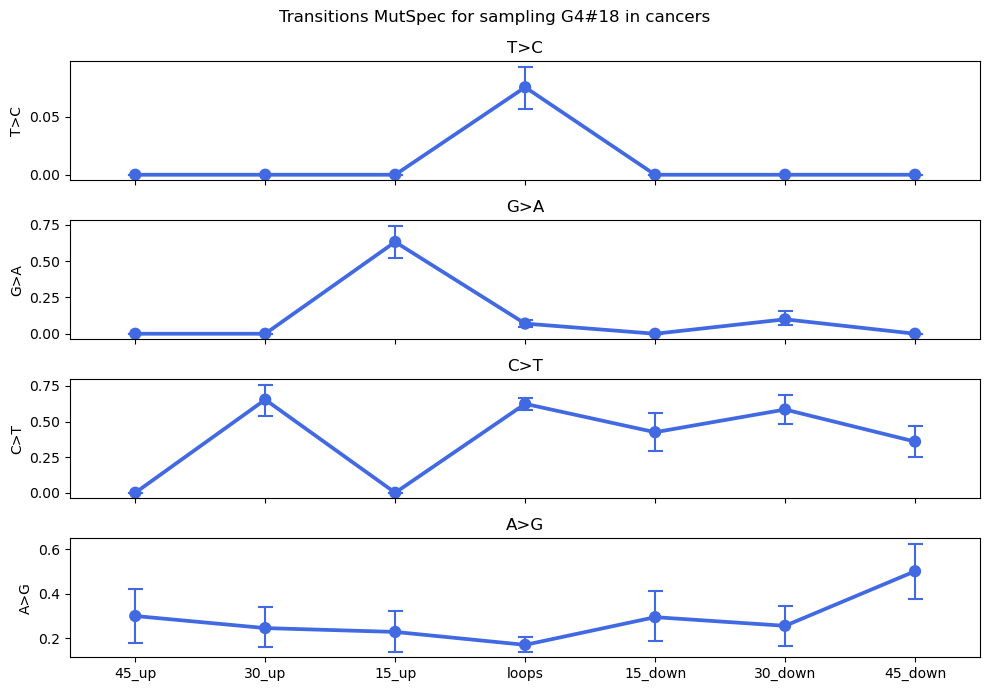

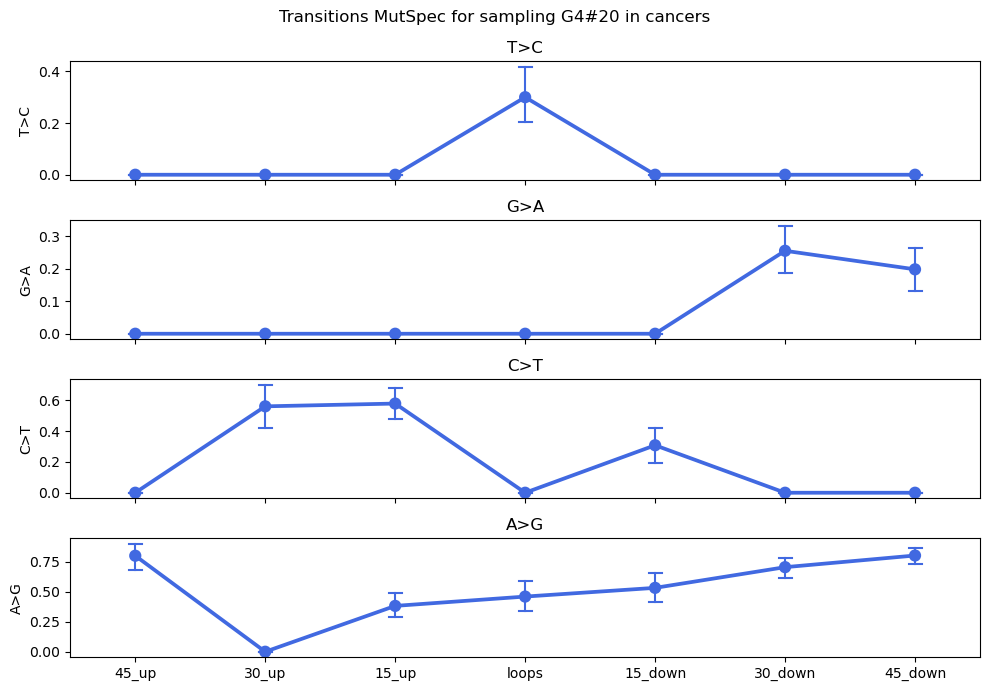

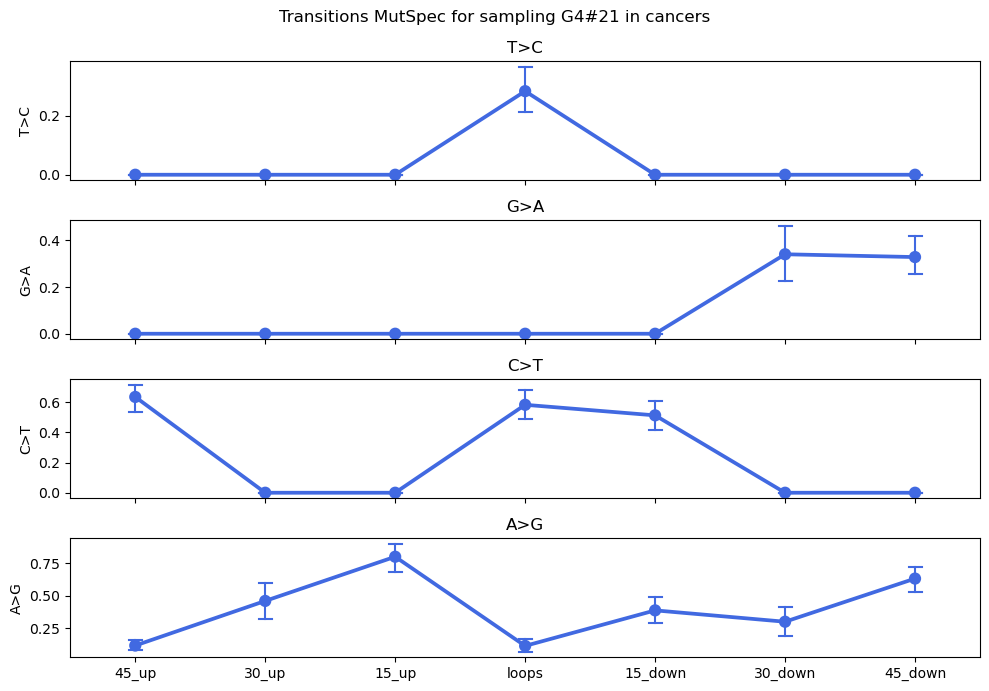

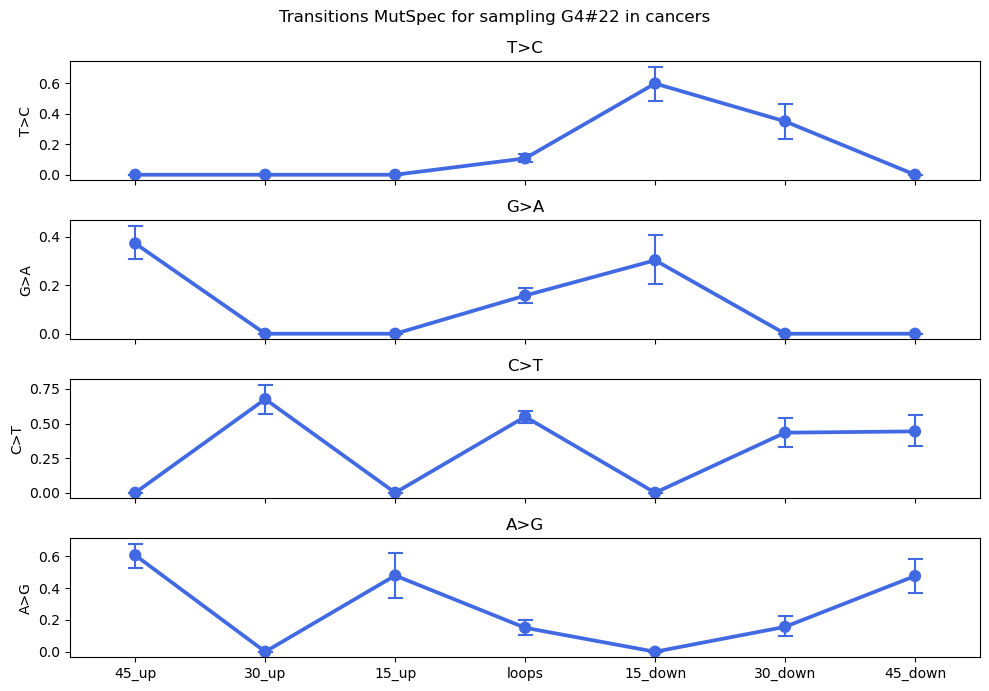

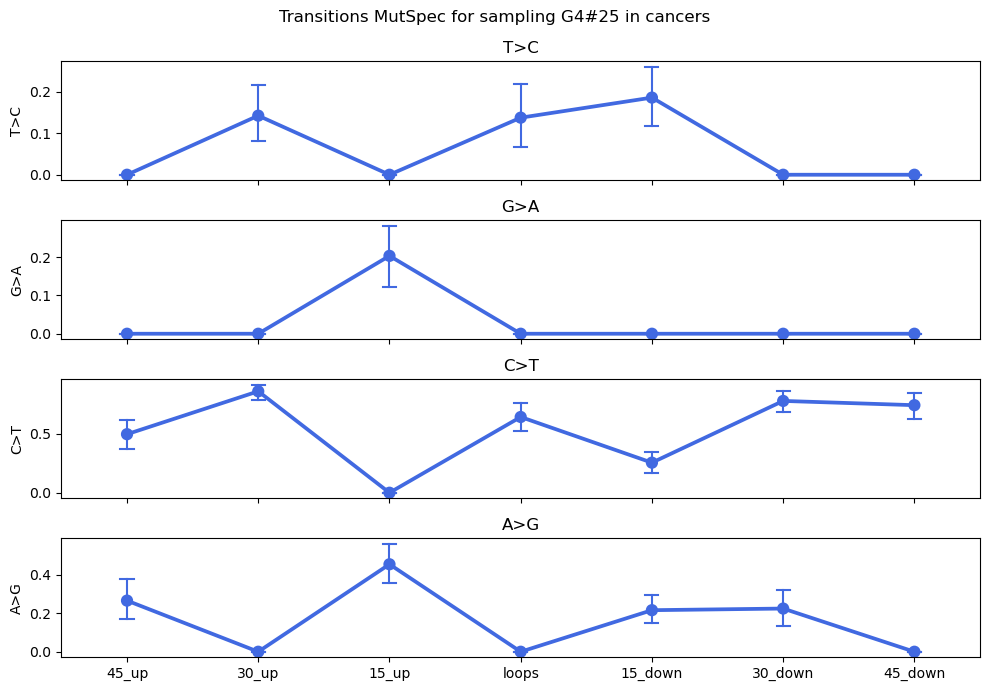

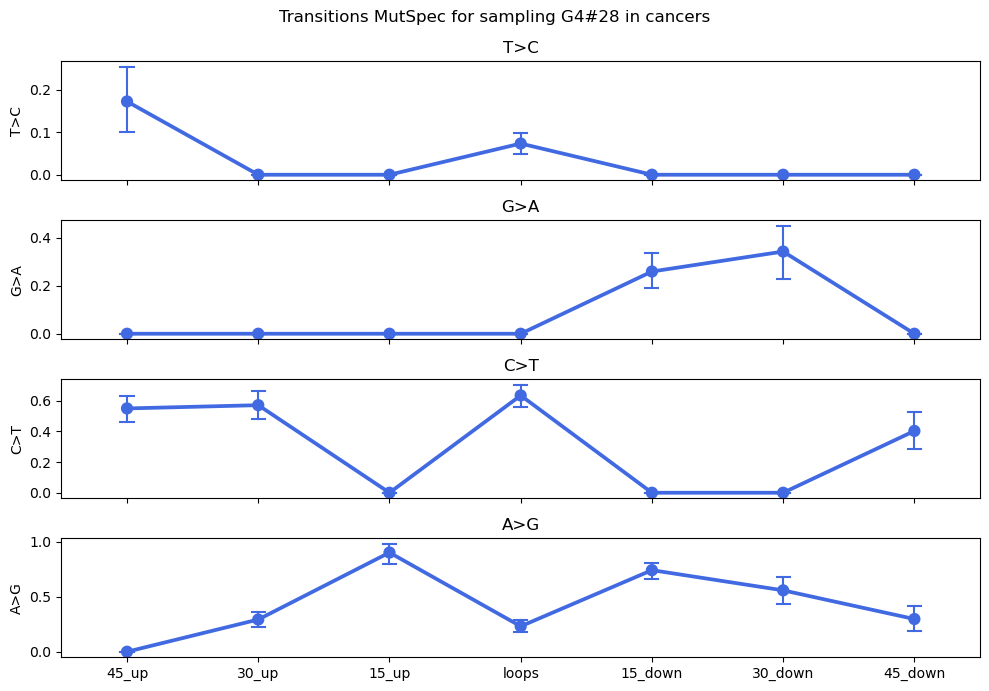

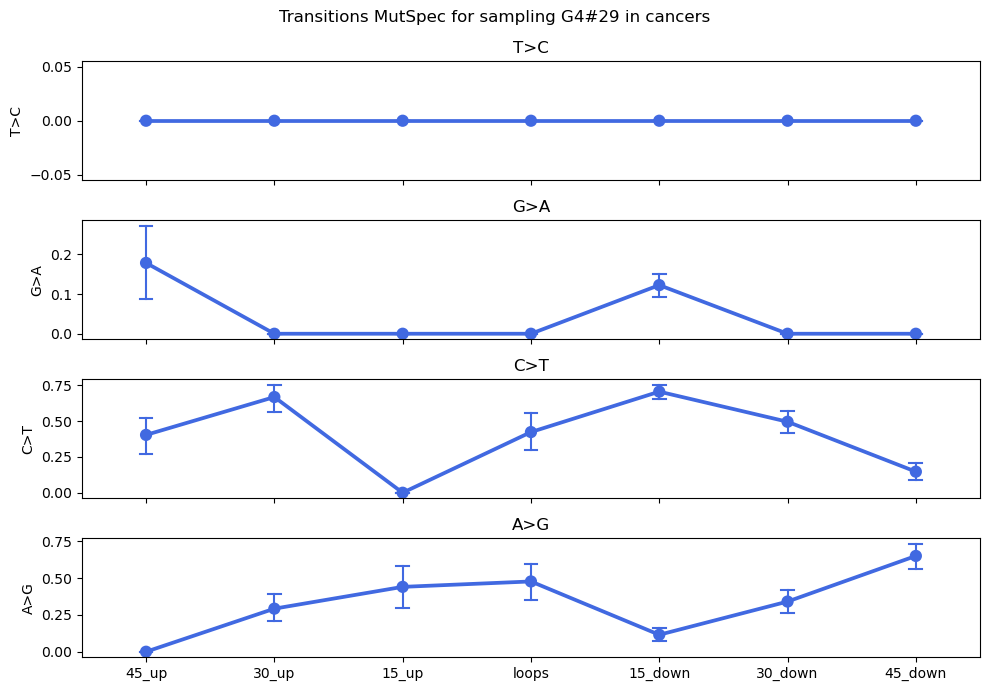

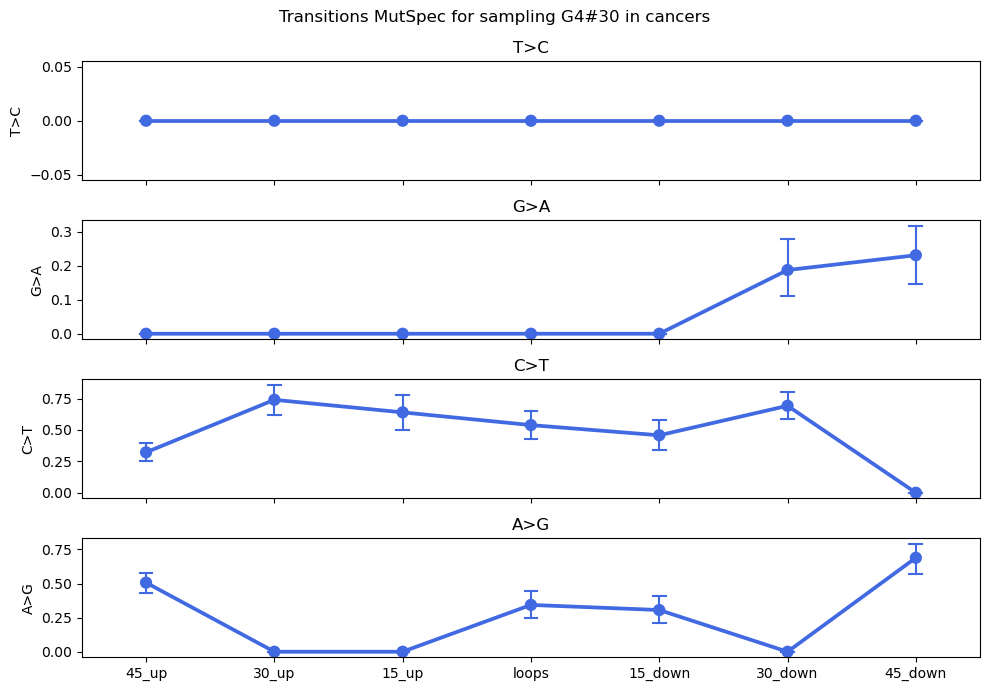

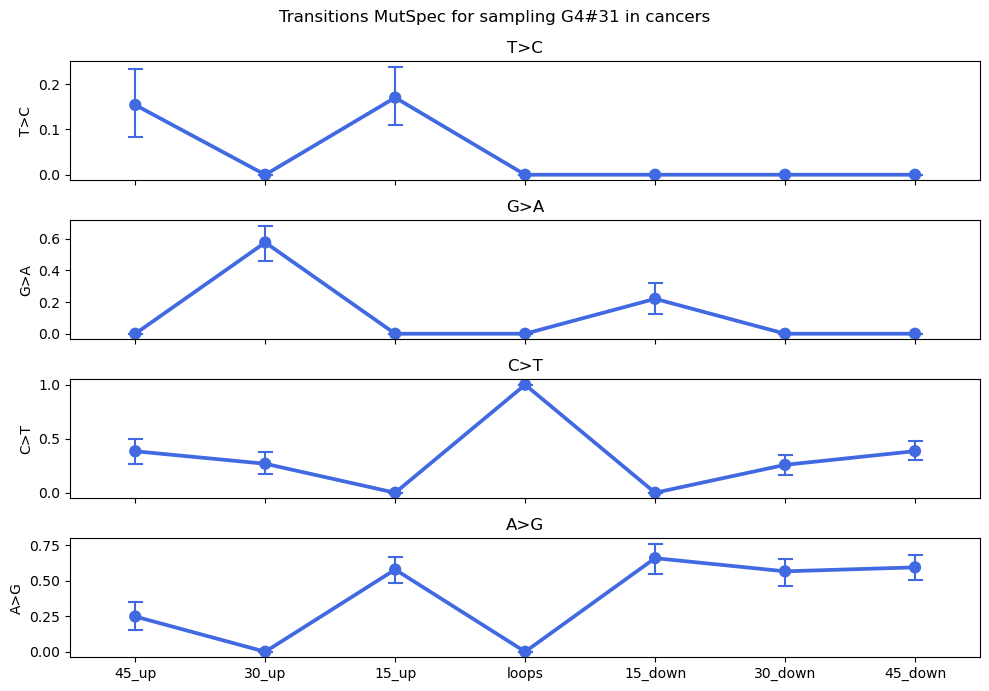

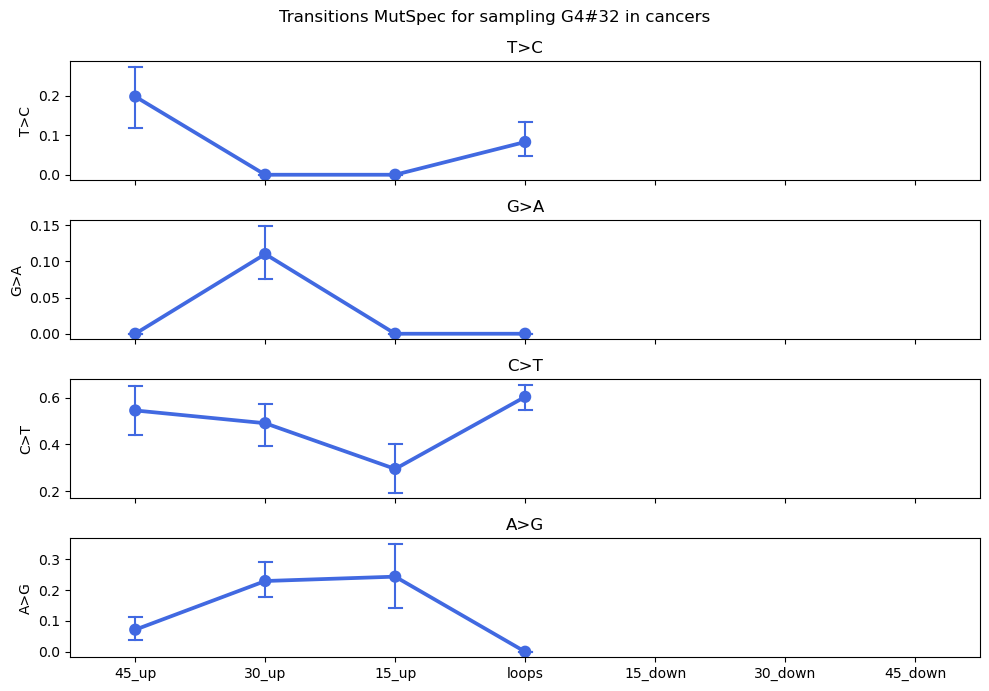

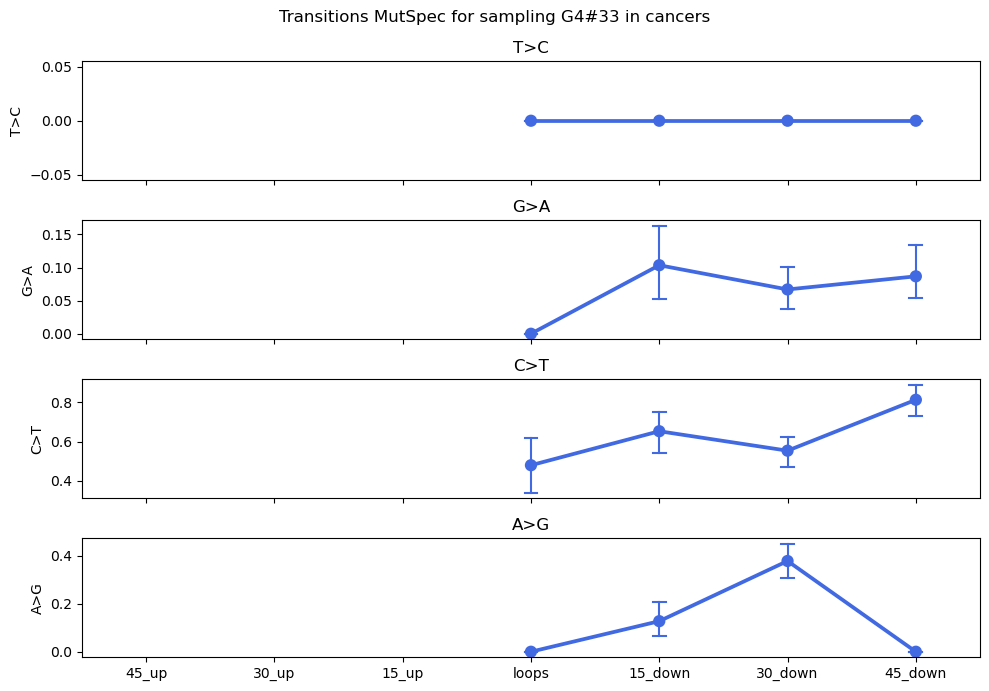

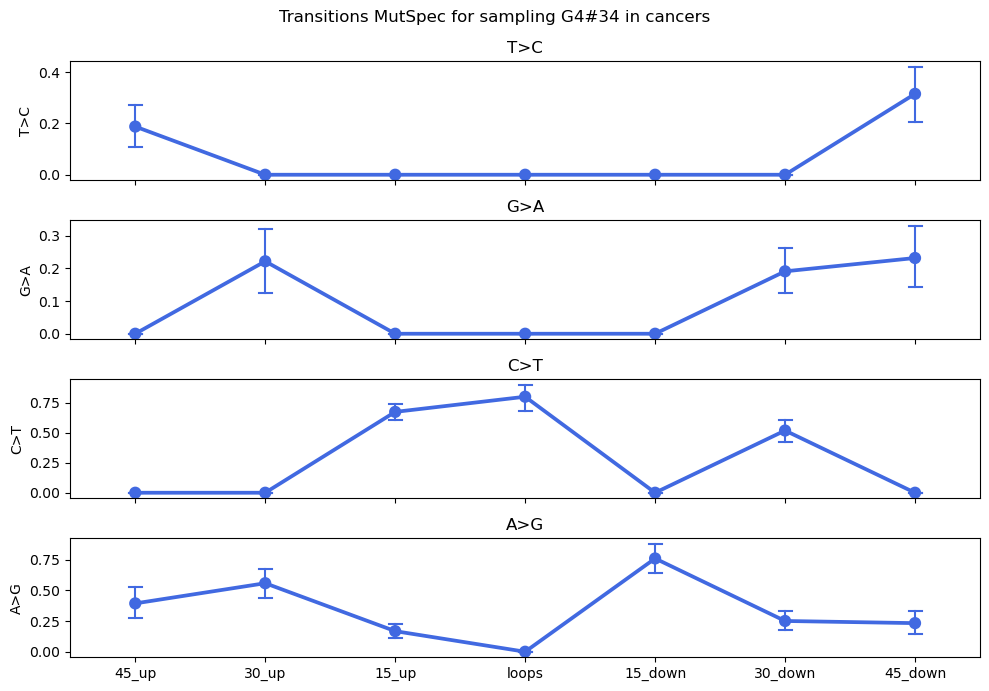

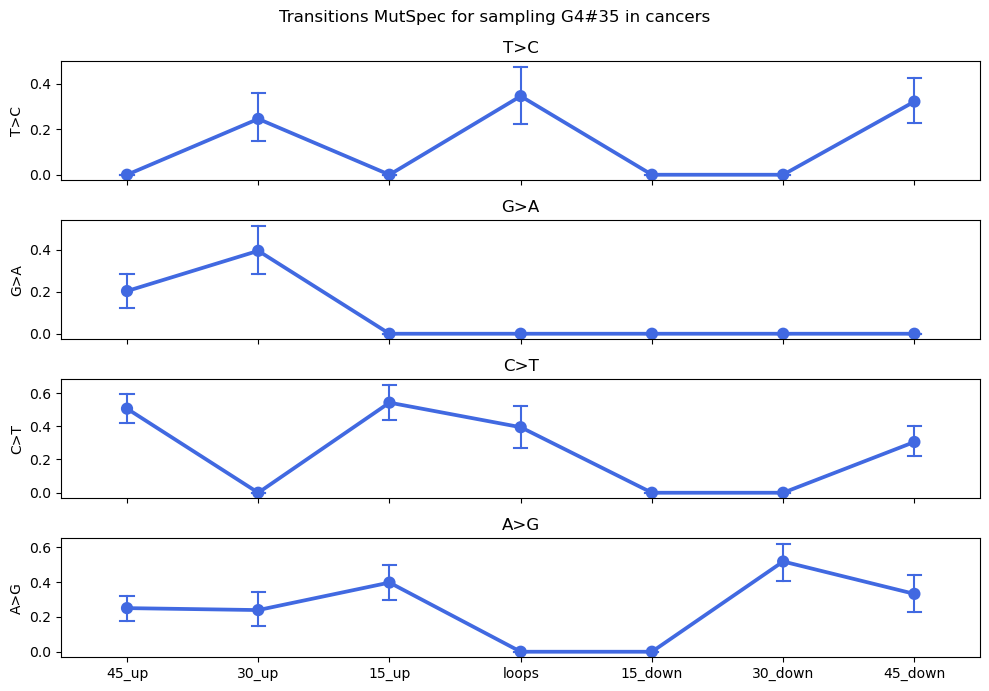

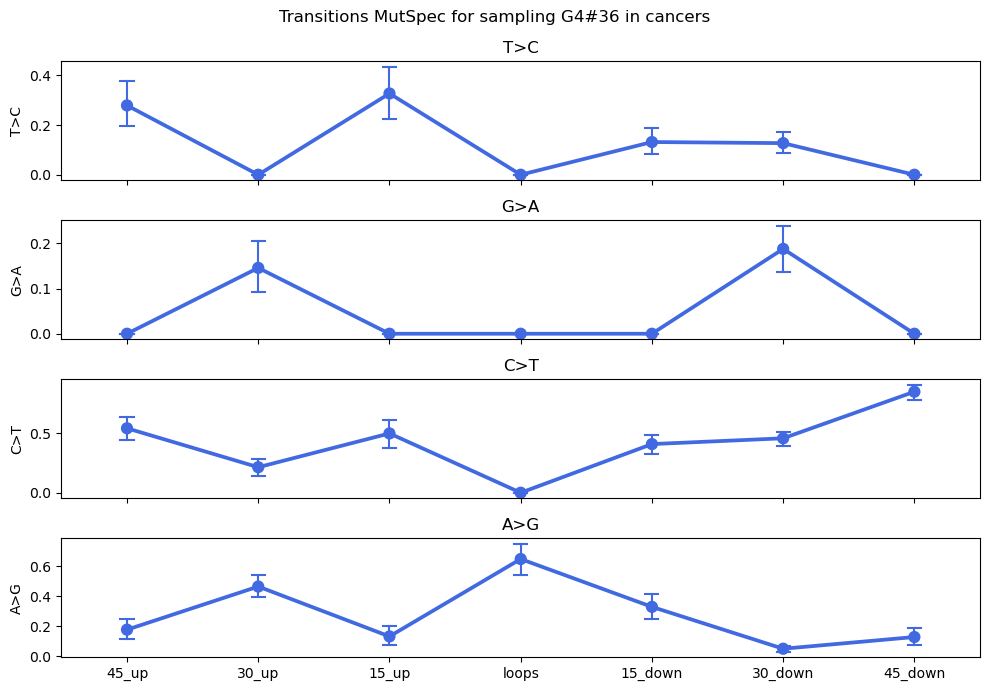

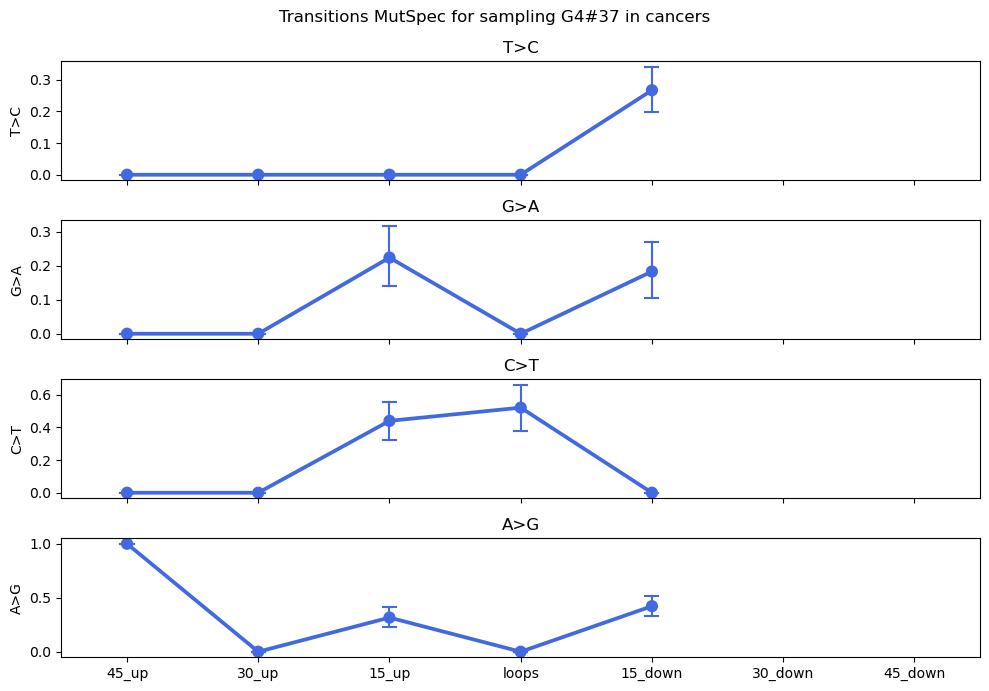

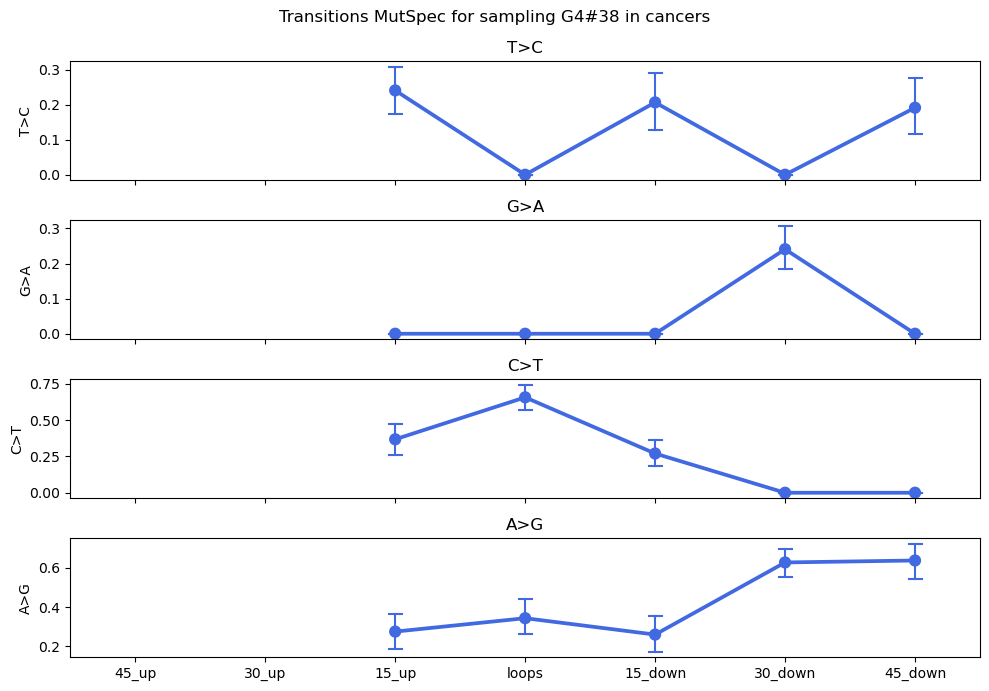

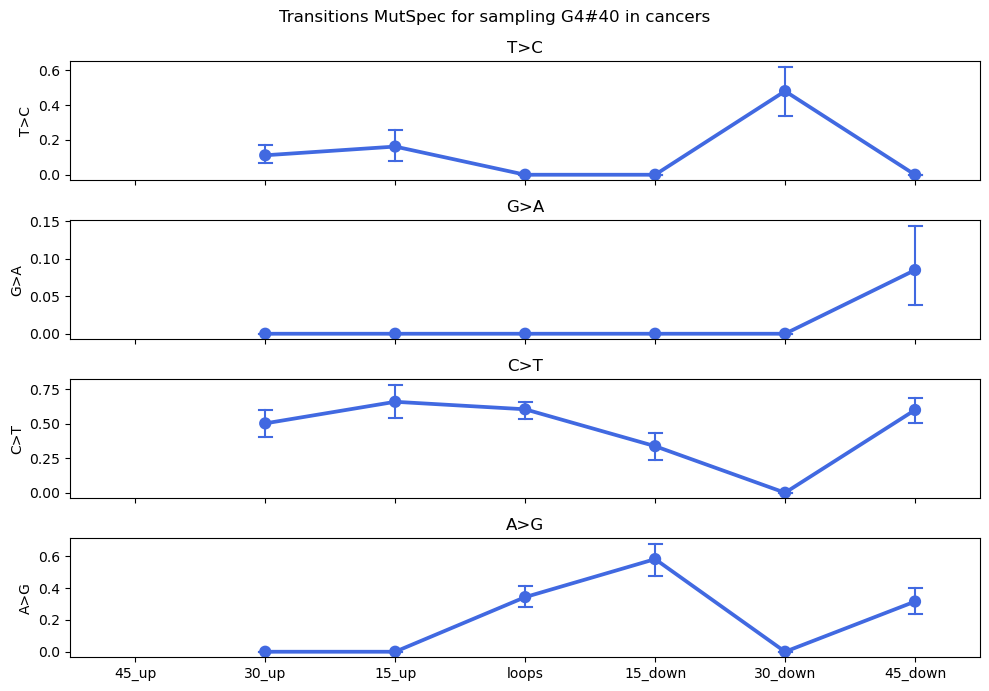

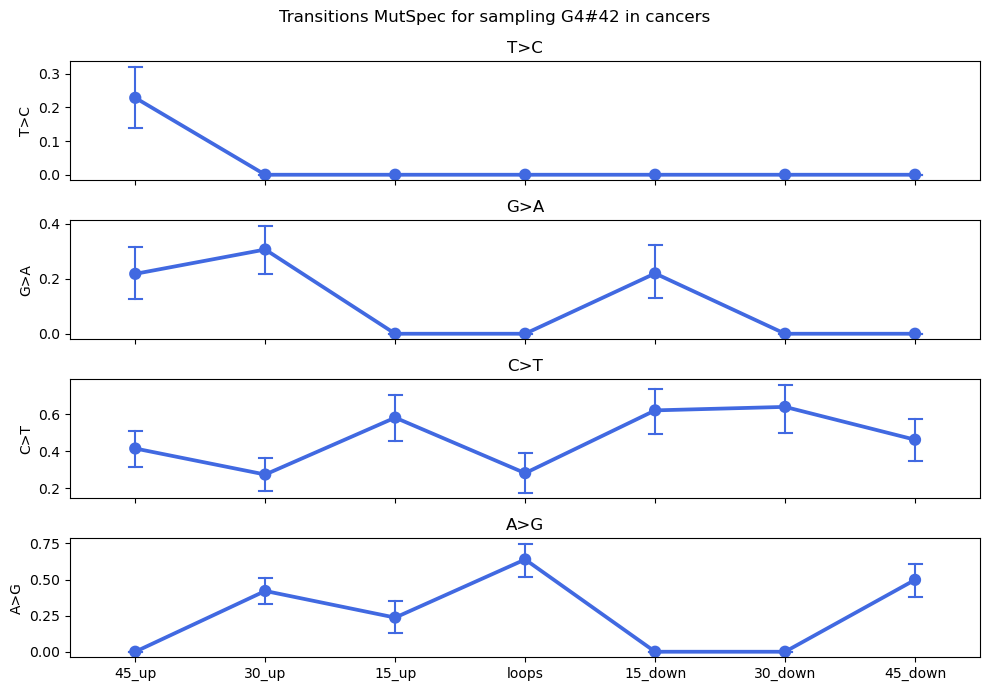

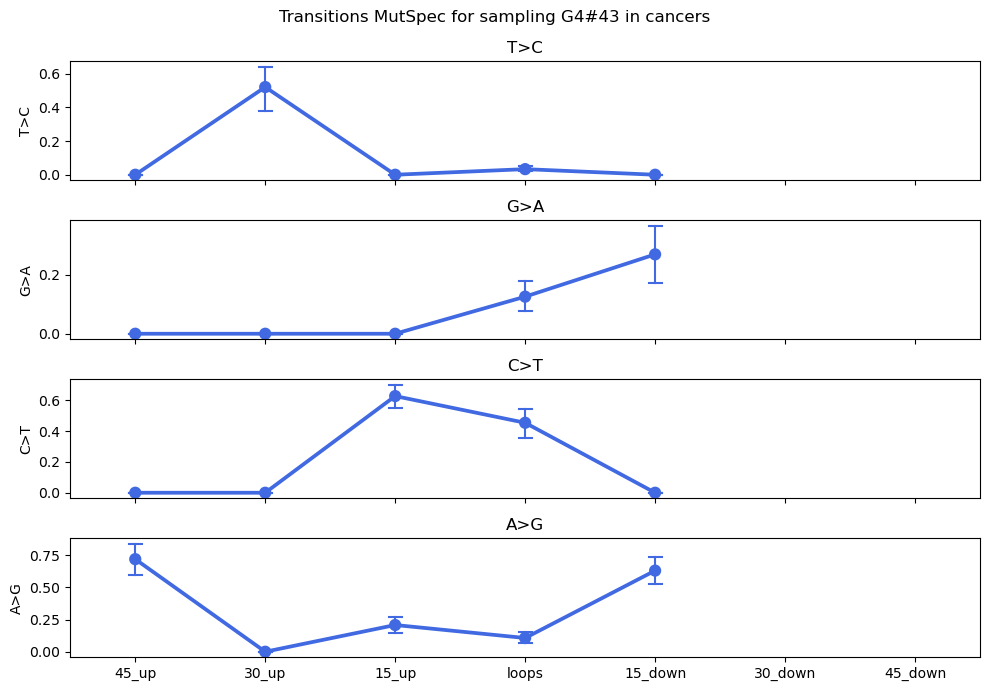

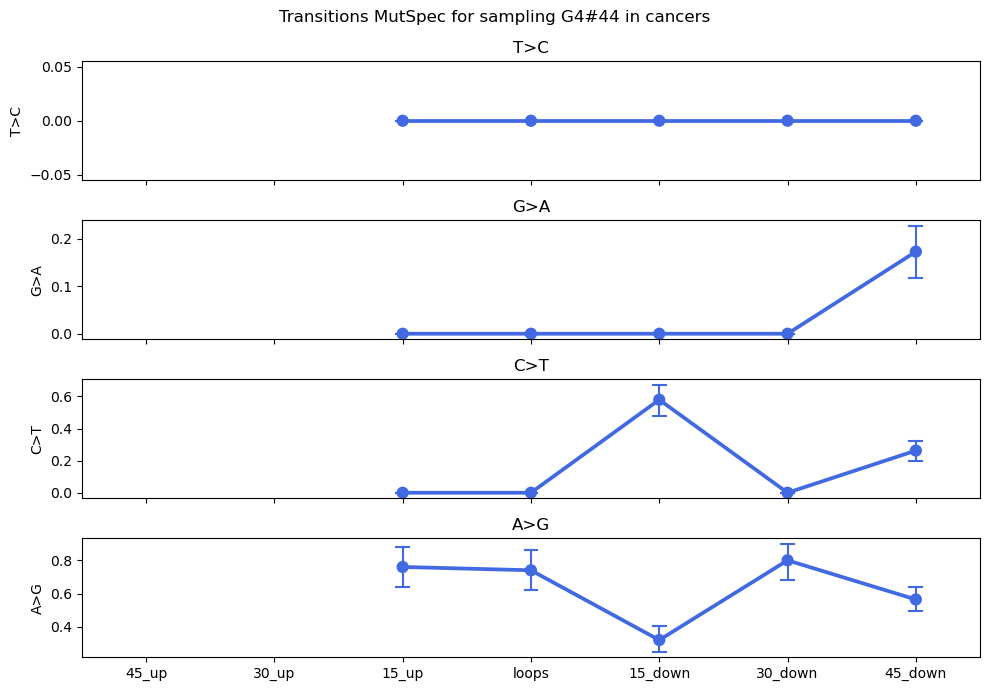

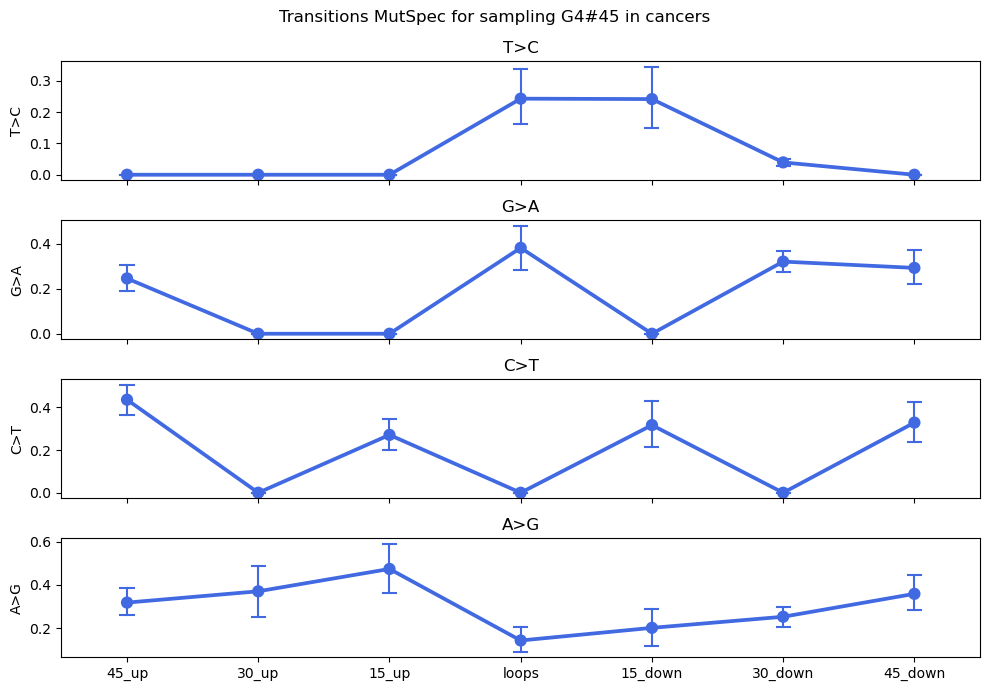

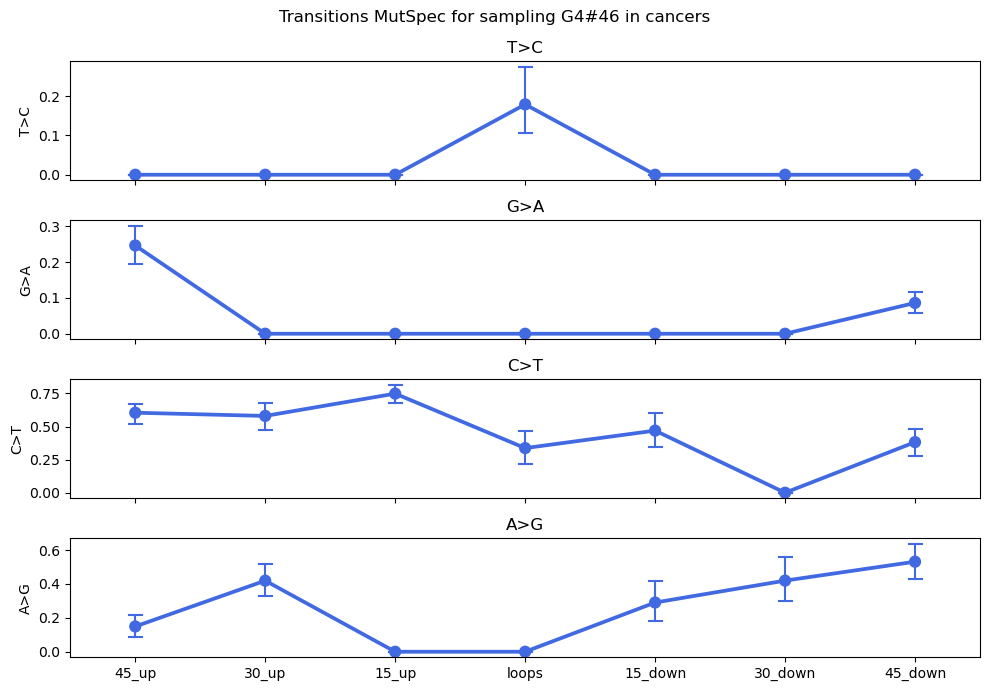

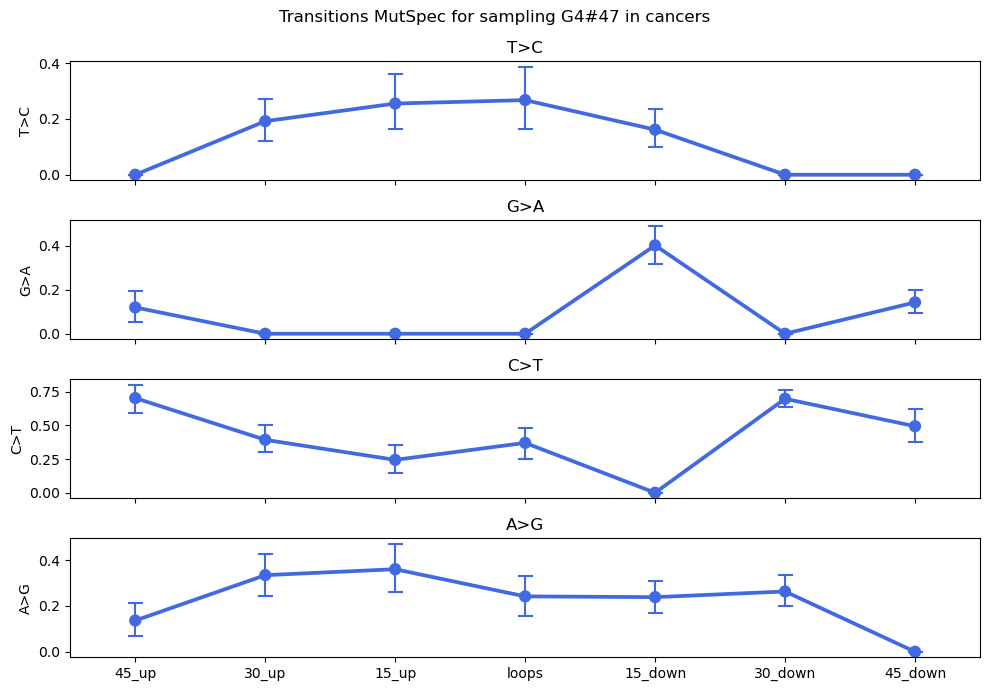

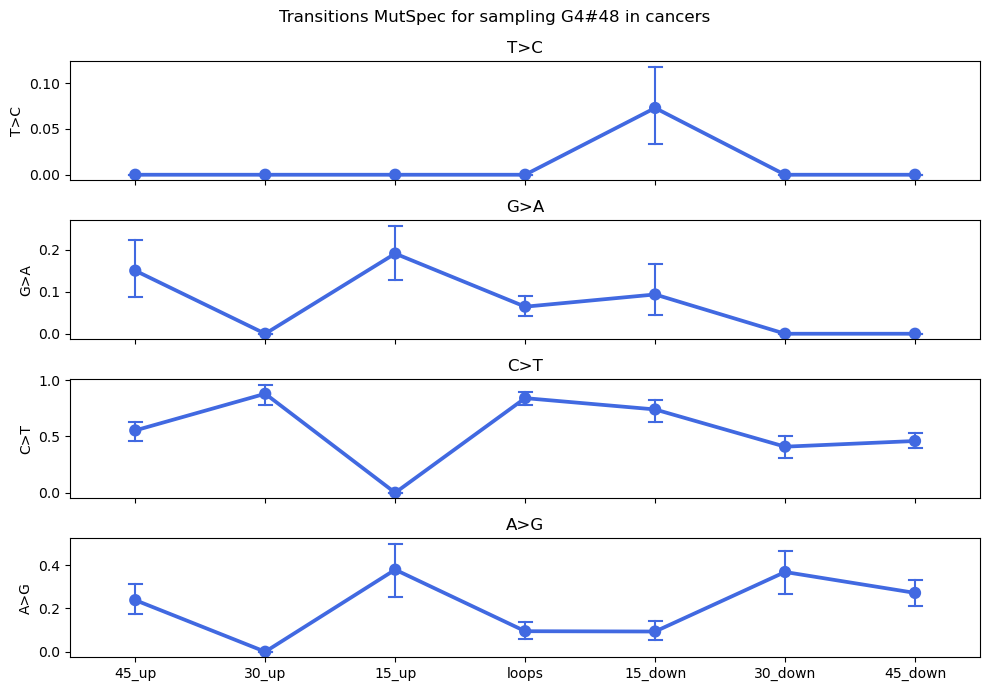

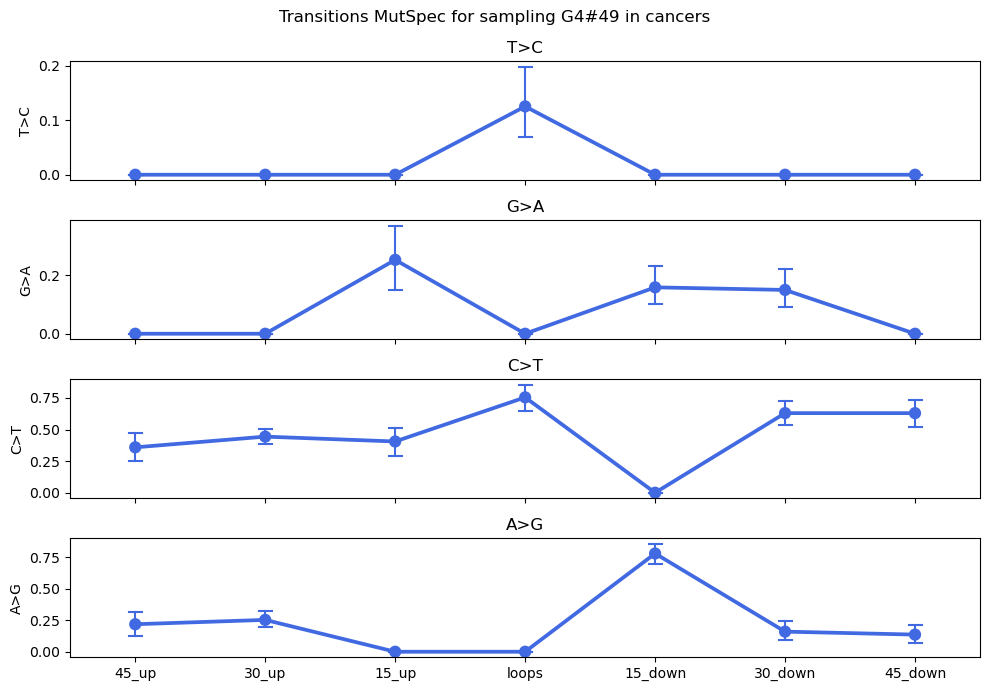

KeyboardInterrupt: 

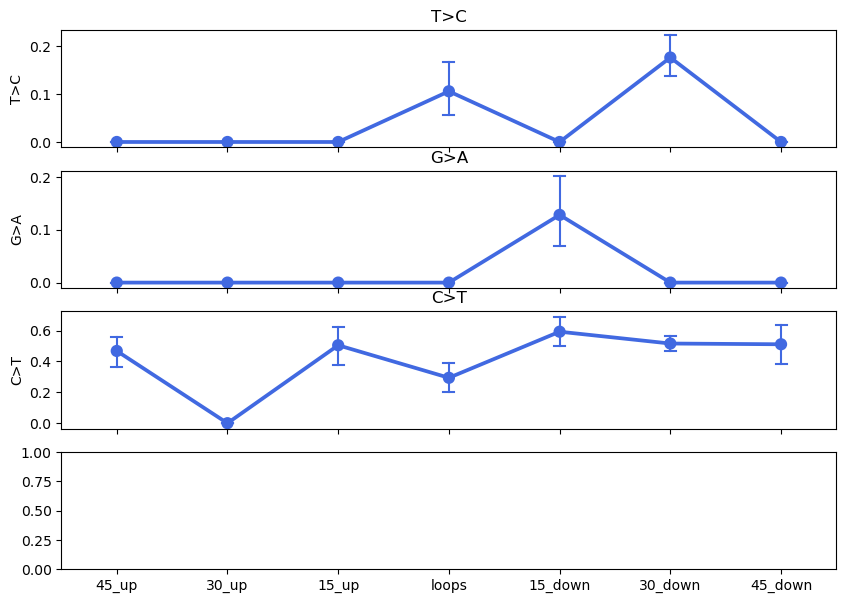

In [62]:
for G4_id in df_sample_norm_concat.G4_id.unique():
    fig, axs = plt.subplots(4, sharex=True,  figsize=(10, 7))
    mutations = ['T>C', 'G>A', 'C>T', 'A>G']
    
    colors = ['royalblue', 'darkorange', 'tomato', 'orchid']
    order = ['45_up', '30_up', '15_up', 'loops', '15_down', '30_down', '45_down']
    
    for i, mutation in enumerate(mutations):
        row = i % 4
        sns.pointplot(data=df_sample_norm_concat[df_sample_norm_concat['G4_id'] == G4_id], 
                     x=df_sample_norm_concat[df_sample_norm_concat['G4_id'] == G4_id]['side'], y=mutation, ax=axs[row], color=colors[0], order=order, capsize=.1, errwidth=1.5) \
            .set(title=mutation, xlabel=None)
    
    
    plt.suptitle(f'Transitions MutSpec for sampling G4#{G4_id} in cancers')
    plt.tight_layout()
    plt.show()